In [48]:
import pandas as pd
import numpy as np

dataset= pd.read_csv('AEP_hourly.csv', sep=';', encoding='ISO-8859-1')
dataset

df = pd.DataFrame(dataset)
df

Datetime   AEP_MW
0       31/12/2004 01:00  13478.0
1       31/12/2004 02:00  12865.0
2       31/12/2004 03:00  12577.0
3       31/12/2004 04:00  12517.0
4       31/12/2004 05:00  12670.0
...                  ...      ...
121268  01/01/2018 20:00  21089.0
121269  01/01/2018 21:00  20999.0
121270  01/01/2018 22:00  20820.0
121271  01/01/2018 23:00  20415.0
121272  02/01/2018 00:00  19993.0

[121273 rows x 2 columns]

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


# Cek Missing Value

In [50]:
df.isna().sum()

Datetime    0
AEP_MW      0
dtype: int64

<Axes: >

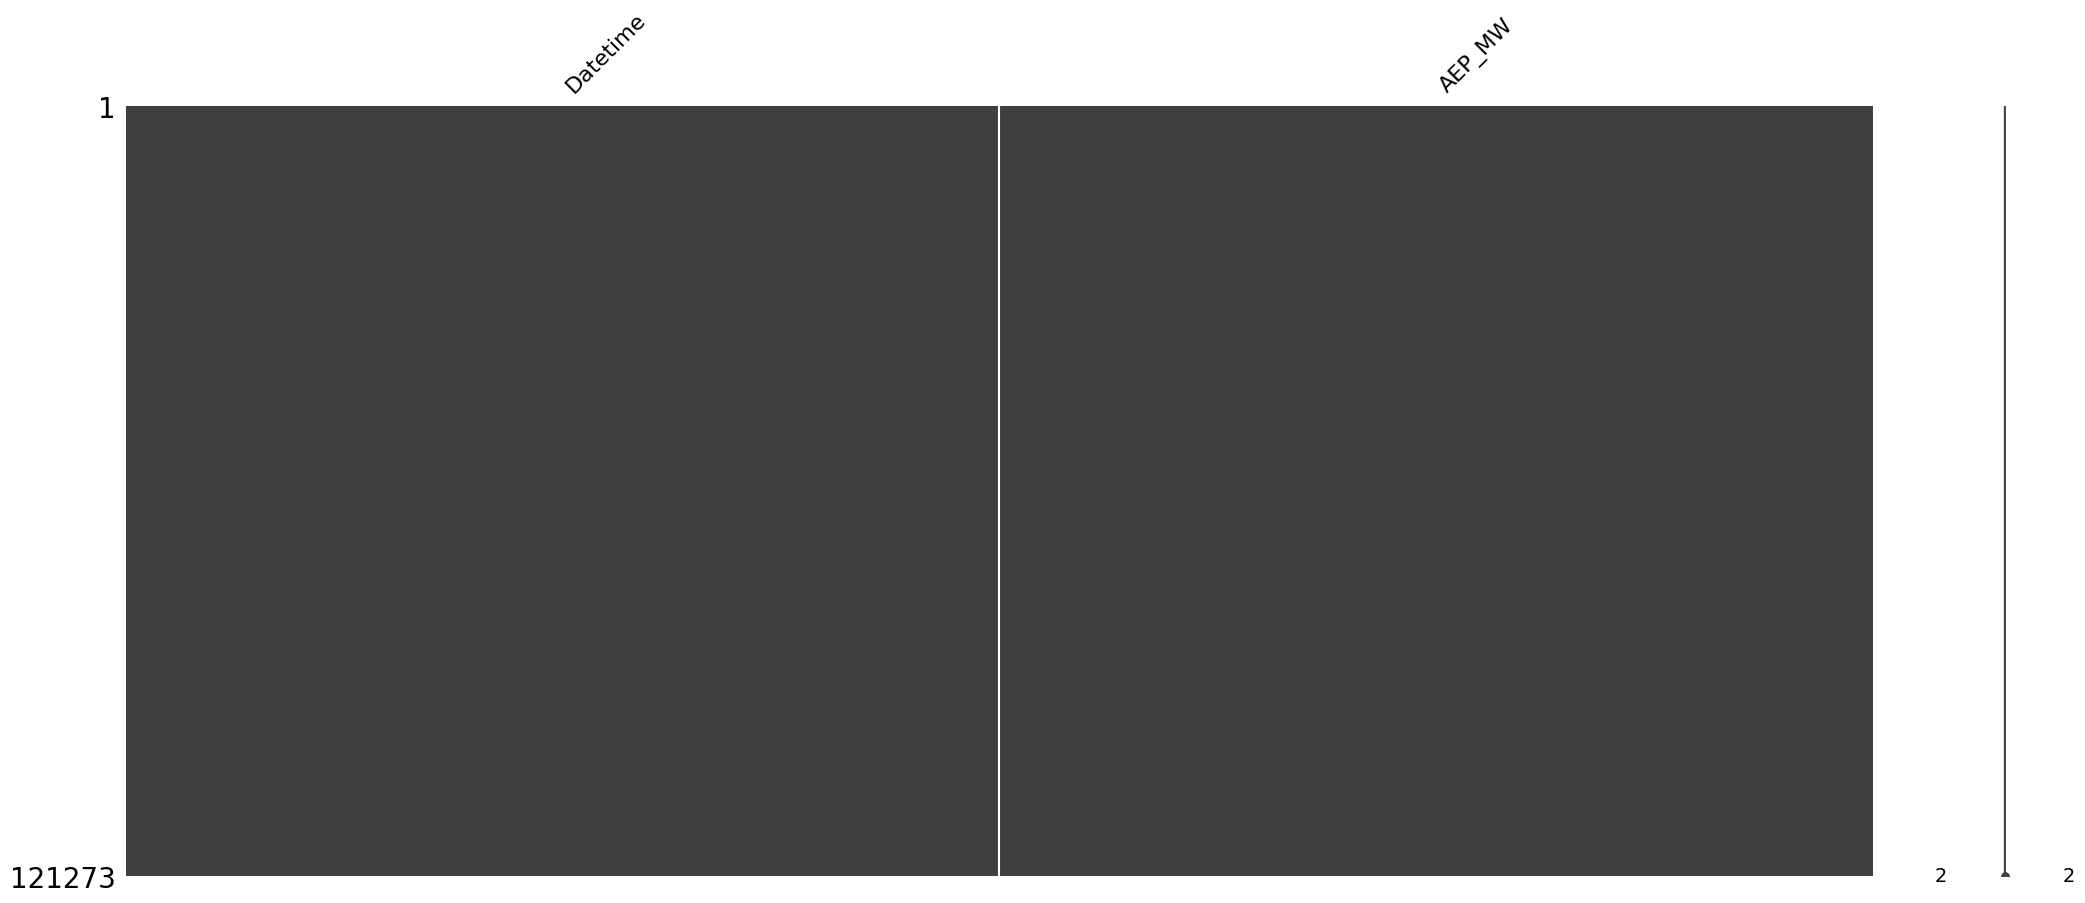

In [51]:
import missingno as msno
msno.matrix(df)

In [52]:
# Load data
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

/tmp/ipython-input-4028587075.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Datetime'] = pd.to_datetime(df['Datetime'])


In [53]:
# Agregasi total harian
df_aep = df.resample('D').sum()
df_aep


AEP_MW
Datetime            
2004-10-01  328544.0
2004-10-02  311997.0
2004-10-03  293450.0
2004-10-04  343417.0
2004-10-05  346553.0
...              ...
2018-07-30  368834.0
2018-07-31  364327.0
2018-08-01  363628.0
2018-08-02  376504.0
2018-08-03   14809.0

[5055 rows x 1 columns]

# Plot Data dengan Garis Tren

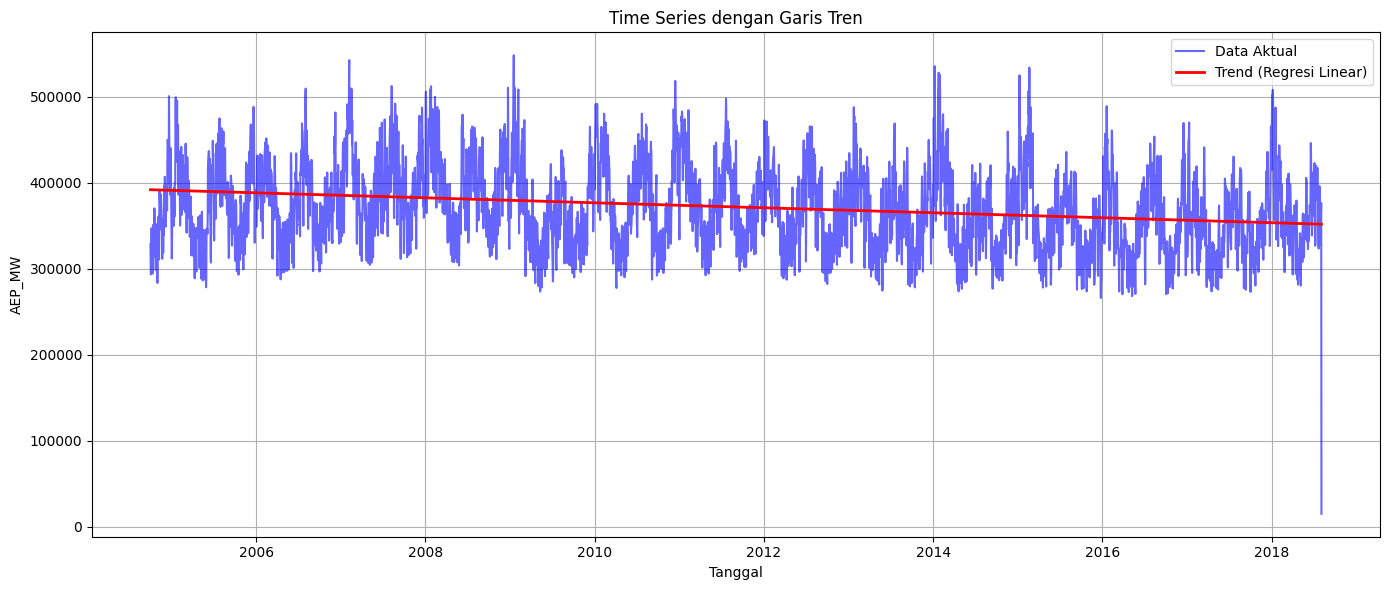

In [54]:
from sklearn.linear_model import LinearRegression
import numpy as np

data = df_aep.copy().dropna()
y = data['AEP_MW'].values
X = np.arange(len(y)).reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)


import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(data.index, y, label='Data Aktual', alpha=0.6, color='blue')
plt.plot(data.index, trend, label='Trend (Regresi Linear)', color='red', linewidth=2)
plt.title("Time Series dengan Garis Tren")
plt.xlabel("Tanggal")
plt.ylabel("AEP_MW")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Total Penggunaan Listrik Per Hari dalam Seminggu

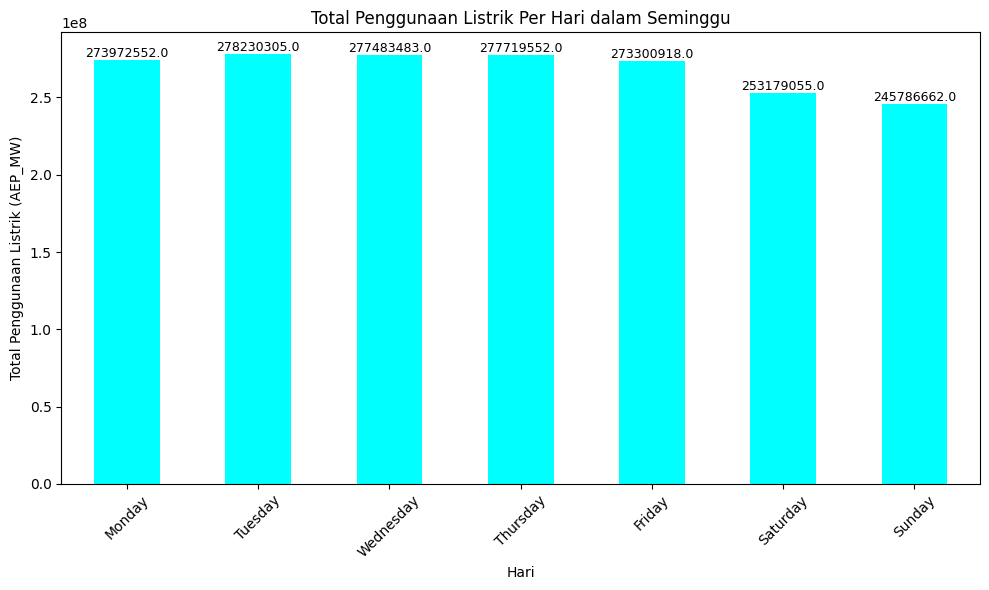

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Agregasi total penggunaan listrik per hari
daily_consumption = df_aep.resample('D').sum()

# Tambahkan kolom untuk hari dalam seminggu
daily_consumption['Day'] = daily_consumption.index.day_name()

# Hitung total penggunaan listrik per hari dalam seminggu
weekly_consumption = daily_consumption.groupby('Day')['AEP_MW'].sum()

# Urutkan hari dalam seminggu
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_consumption = weekly_consumption.reindex(days_order)

# Plotting
plt.figure(figsize=(10, 6))
weekly_consumption.plot(kind='bar', color='cyan')
plt.title("Total Penggunaan Listrik Per Hari dalam Seminggu")
plt.xlabel("Hari")
plt.ylabel("Total Penggunaan Listrik (AEP_MW)")
plt.xticks(rotation=45)

# Tambahkan angka di atas batang
for i, value in enumerate(weekly_consumption):
    plt.text(i, value + 0.5, round(value, 2), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Total Penggunaan Listrik Per Tahun

/tmp/ipython-input-2980621739.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_consumption = df_aep.resample('M').sum()


<Figure size 1200x800 with 0 Axes>

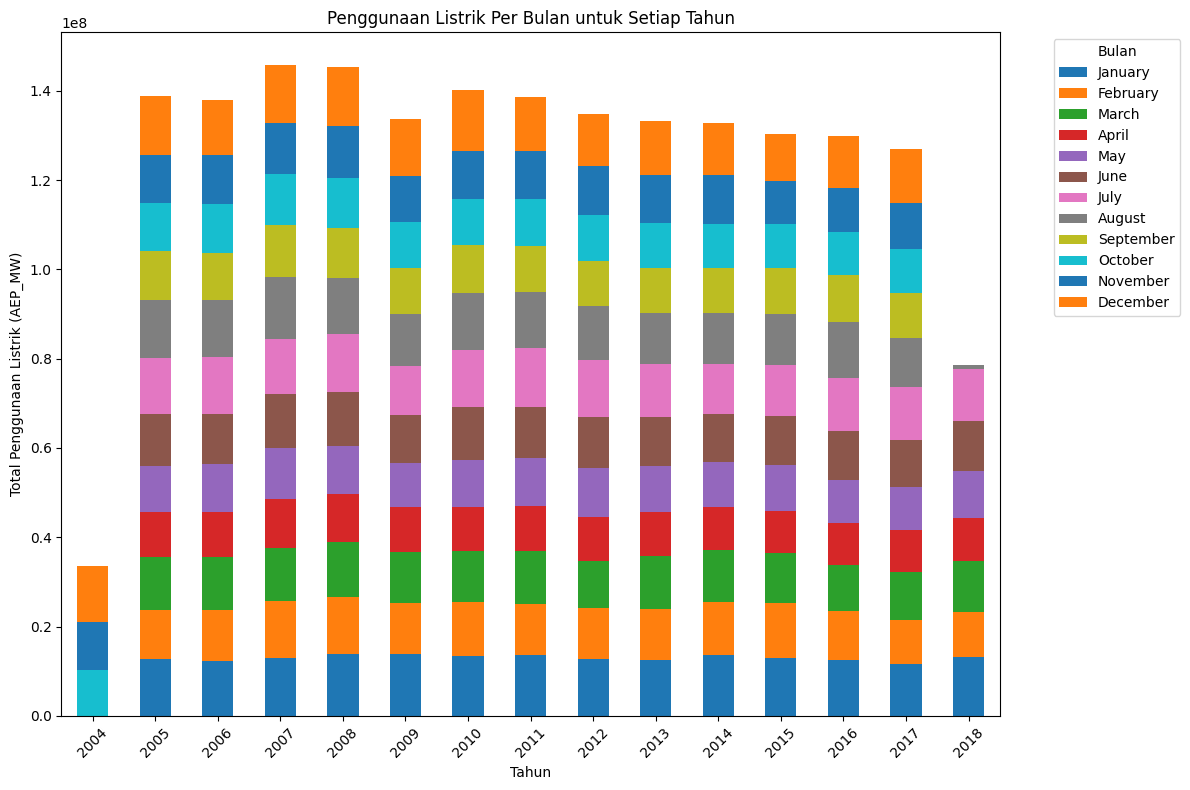

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Agregasi total penggunaan listrik per bulan dan tahun
monthly_consumption = df_aep.resample('M').sum()

# Tambahkan kolom tahun dan bulan
monthly_consumption['Year'] = monthly_consumption.index.year
monthly_consumption['Month'] = monthly_consumption.index.month_name()

# Buat pivot table untuk memformat data
pivot_table = monthly_consumption.pivot_table(values='AEP_MW', index='Year', columns='Month', fill_value=0)

# Urutkan bulan dalam setahun
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
pivot_table = pivot_table[months_order]

# Plotting
plt.figure(figsize=(12, 8))
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title("Penggunaan Listrik Per Bulan untuk Setiap Tahun")
plt.xlabel("Tahun")
plt.ylabel("Total Penggunaan Listrik (AEP_MW)")
plt.xticks(rotation=45)
plt.legend(title='Bulan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Total Penggunaan Listrik Per Musim

/tmp/ipython-input-3938552779.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_consumption = df_aep.resample('M').sum()


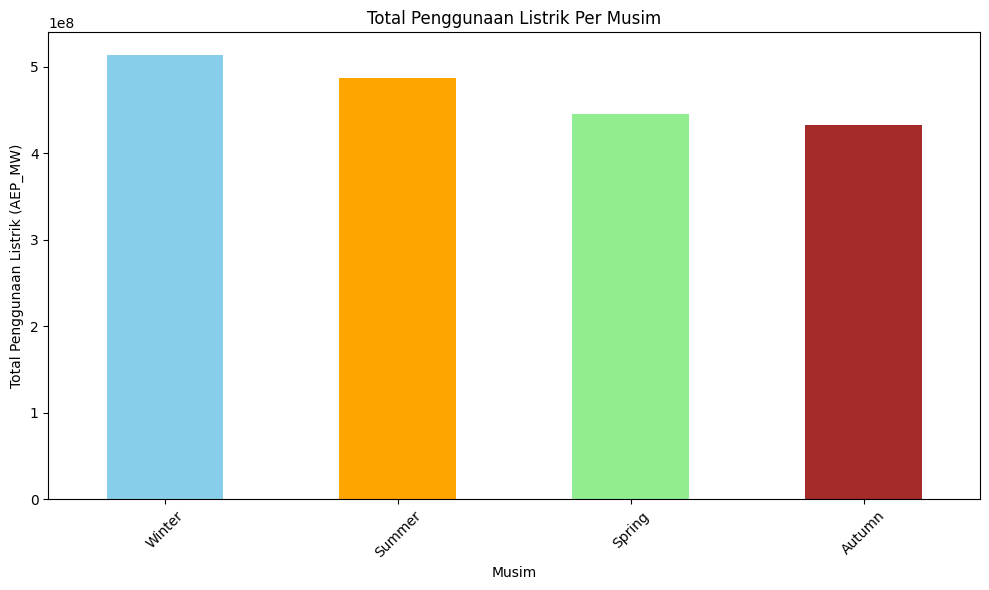

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Agregasi total penggunaan listrik per bulan
monthly_consumption = df_aep.resample('M').sum()

# Tambahkan kolom untuk musim
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

monthly_consumption['Season'] = monthly_consumption.index.month.map(get_season)

# Hitung total penggunaan listrik per musim
seasonal_consumption = monthly_consumption.groupby('Season')['AEP_MW'].sum()

# Urutkan dari yang tertinggi
seasonal_consumption = seasonal_consumption.sort_values(ascending=False)

# Tentukan warna untuk setiap musim
colors = {
    'Winter': 'skyblue',
    'Spring': 'lightgreen',
    'Summer': 'orange',
    'Autumn': 'brown'
}

# Plotting dengan warna yang berbeda untuk setiap musim
plt.figure(figsize=(10, 6))
seasonal_consumption.plot(kind='bar', color=[colors[season] for season in seasonal_consumption.index])
plt.title("Total Penggunaan Listrik Per Musim")
plt.xlabel("Musim")
plt.ylabel("Total Penggunaan Listrik (AEP_MW)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Decomposition

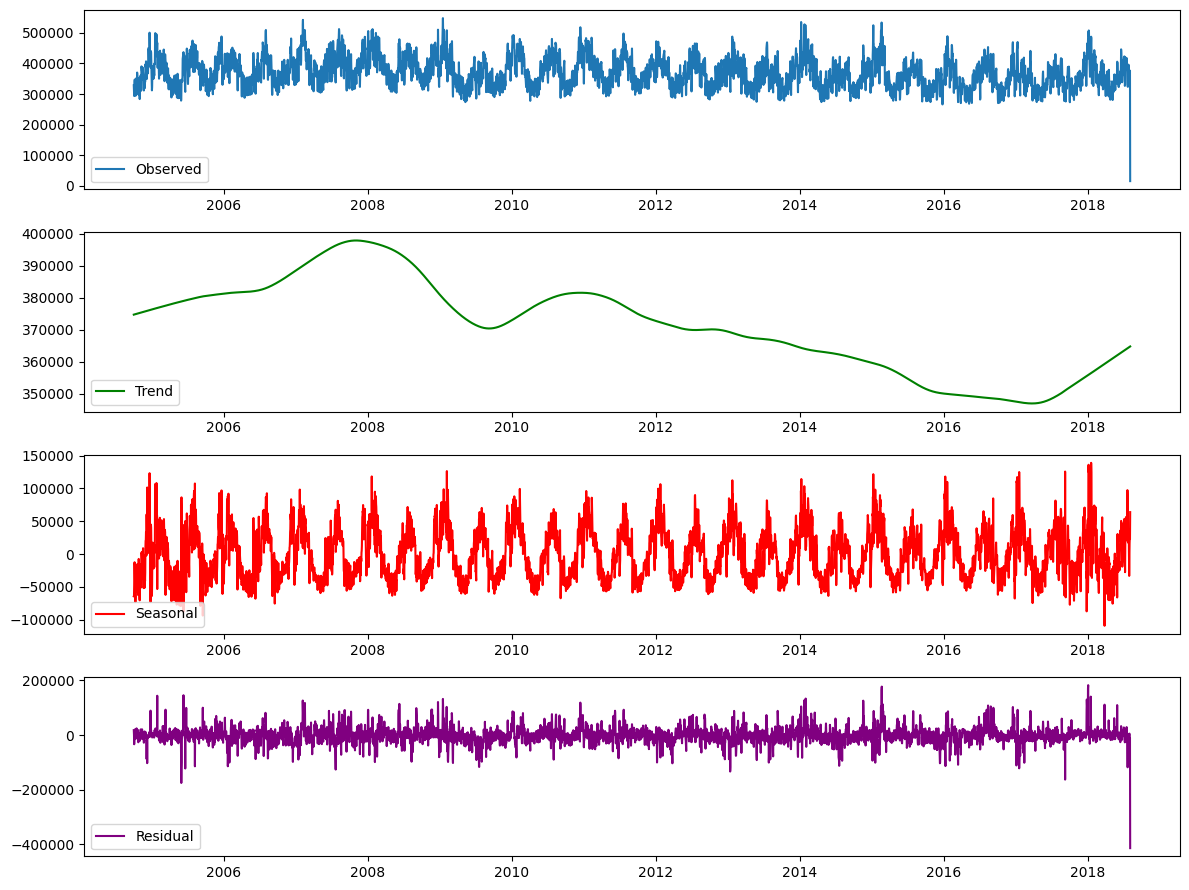

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL
import matplotlib.pyplot as plt

# Decomposisi time series
decomposition = seasonal_decompose(df_aep['AEP_MW'], model='additive', period=30)
stl = STL(df_aep['AEP_MW'], period=365, robust=True)
res = stl.fit()

plt.figure(figsize=(12, 9))

plt.subplot(411)
plt.plot(df_aep.index, df_aep['AEP_MW'], label='Observed')
plt.legend(loc='lower left')

plt.subplot(412)
plt.plot(df_aep.index, res.trend, label='Trend', color='green')
plt.legend(loc='lower left')

plt.subplot(413)
plt.plot(df_aep.index, res.seasonal, label='Seasonal', color='red')
plt.legend(loc='lower left')

plt.subplot(414)
plt.plot(df_aep.index, res.resid, label='Residual', color='purple')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()


# Cek Linieritas

Kolmogorov-Smirnov Test Statistic: 0.0507
p-value: 0.0000
Asumsi linearitas tidak terpenuhi


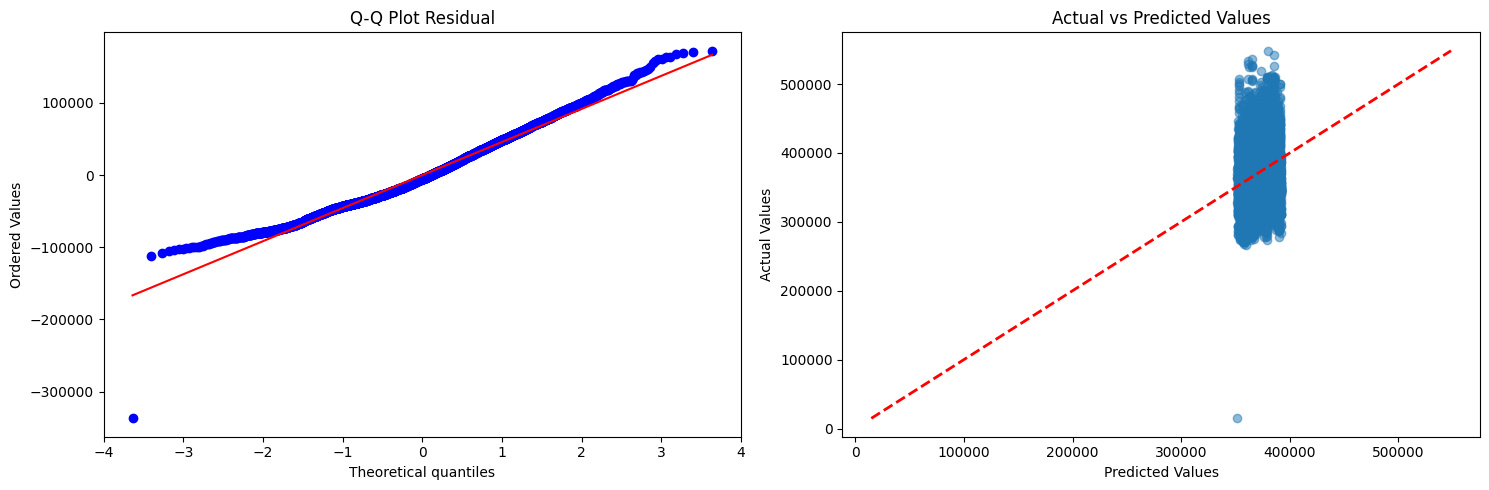

In [59]:
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# === Data & Model ===
data = df_aep.copy().dropna()
y = data['AEP_MW'].values
X = np.arange(len(y)).reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)

# Residual
residuals = y - trend

# === Uji Normalitas Residual (Kolmogorov-Smirnov) ===
# Standarisasi residual biar mean=0, std=1
residuals_std = (residuals - np.mean(residuals)) / np.std(residuals)

ks_stat, p_value = stats.kstest(residuals_std, 'norm')

print(f"Kolmogorov-Smirnov Test Statistic: {ks_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value > 0.05:
    print("Asumsi linearitas terpenuhi")
else:
    print("Asumsi linearitas tidak terpenuhi")

# === Visualisasi ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Q-Q Plot Residual
stats.probplot(residuals, dist="norm", plot=ax1)
ax1.set_title("Q-Q Plot Residual")

# Scatter plot: Actual vs Predicted
ax2.scatter(trend, y, alpha=0.5)
ax2.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Actual vs Predicted Values')

plt.tight_layout()
plt.show()


# Cek Normalitas

/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5055.
  res = hypotest_fun_out(*samples, **kwds)


=== Uji Normalitas Residual ===
Kolmogorov-Smirnov Test → Statistic: 0.0507, p-value: 0.0000
Residual tidak normal (asumsi normalitas tidak terpenuhi)


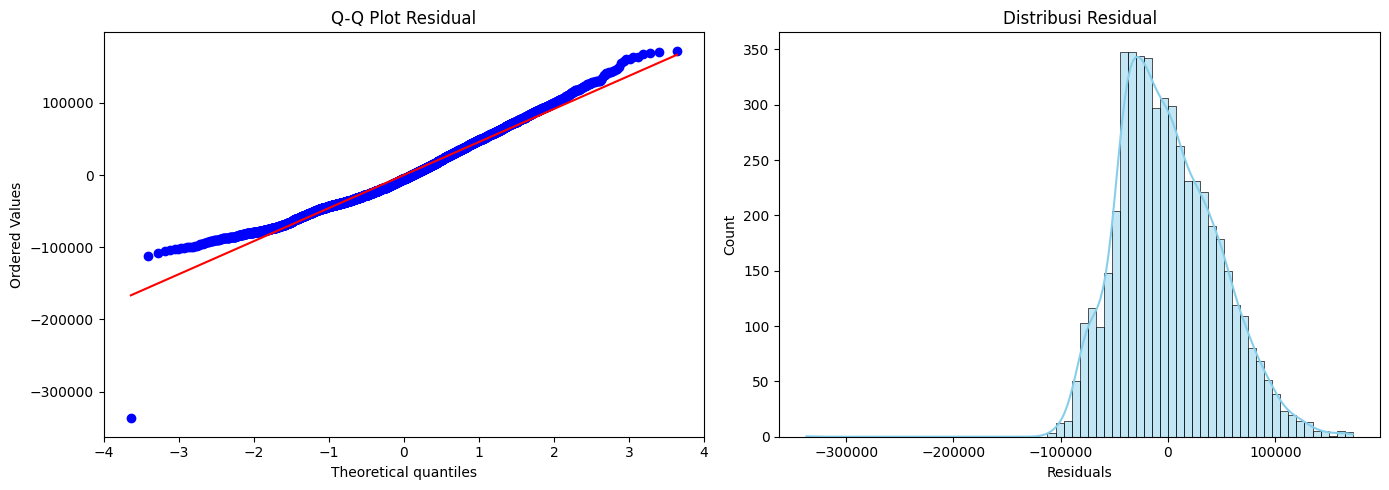

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import numpy as np

# === Data & Model ===
data = df_aep.copy().dropna()
y = data['AEP_MW'].values
X = np.arange(len(y)).reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)

# Residual
residuals = y - trend

# ===================================
# 🔹 Uji Normalitas Residual
# ===================================

# Shapiro-Wilk Test
shapiro_stat, shapiro_p = stats.shapiro(residuals)

# KS Test (standarisasi dulu)
residuals_std = (residuals - np.mean(residuals)) / np.std(residuals)
ks_stat, ks_p = stats.kstest(residuals_std, 'norm')

print("=== Uji Normalitas Residual ===")
print(f"Kolmogorov-Smirnov Test → Statistic: {ks_stat:.4f}, p-value: {ks_p:.4f}")

# Interpretasi
if shapiro_p > 0.05 and ks_p > 0.05:
    print("Residual mengikuti distribusi normal (asumsi normalitas terpenuhi)")
else:
    print("Residual tidak normal (asumsi normalitas tidak terpenuhi)")

# ===================================
# 🔹 Visualisasi
# ===================================

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Q-Q Plot
stats.probplot(residuals, dist="norm", plot=ax[0])
ax[0].set_title("Q-Q Plot Residual")

# Histogram + KDE
sns.histplot(residuals, kde=True, ax=ax[1], color="skyblue")
ax[1].set_title("Distribusi Residual")
ax[1].set_xlabel("Residuals")

plt.tight_layout()
plt.show()


# Cek Stasioneritas

In [61]:
from statsmodels.tsa.stattools import adfuller

# Ambil data total konsumsi harian (tanpa NaN)
data = df_aep['AEP_MW'].dropna()

# Lakukan ADF test
adf_result = adfuller(data)

# Print hasil langsung baris per baris dengan 6 angka di belakang koma
print(f"ADF Statistic              : {adf_result[0]:.4f}")
print(f"p-value                    : {adf_result[1]:.4f}")
print(f"Lag Used                   : {adf_result[2]}")
print(f"Number of Observations Used: {adf_result[3]}")

print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key} : {value:.6f}")

# Interpretasi stasioneritas
if adf_result[1] <= 0.05:
    print("\nData bersifat STASIONER (p-value <= 0.05)")
else:
    print("\nData TIDAK STASIONER (p-value > 0.05)")


ADF Statistic              : -7.2796
p-value                    : 0.0000
Lag Used                   : 30
Number of Observations Used: 5024
Critical Values:
   1% : -3.431652
   5% : -2.862115
   10% : -2.567076

Data bersifat STASIONER (p-value <= 0.05)


# Random Forest Forecasting

## Forecasting per jam

RMSE Train: 7402.26, MAPE Train: 1.45%
RMSE Test: 23331.84, MAPE Test: 6.85%

=== Tabel Hasil Lengkap ===
      Period    Actual      Predicted
0          1  347439.0  346769.986062
1          2  351691.0  351429.037417
2          3  346772.0  348459.673808
3          4  343864.0  344715.408815
4          5  342247.0  341340.949875
...      ...       ...            ...
5026    5027  368834.0  366860.534785
5027    5028  364327.0  369543.527503
5028    5029  363628.0  359060.103030
5029    5030  376504.0  359065.311386
5030    5031   14809.0  367545.245971

[5031 rows x 3 columns]


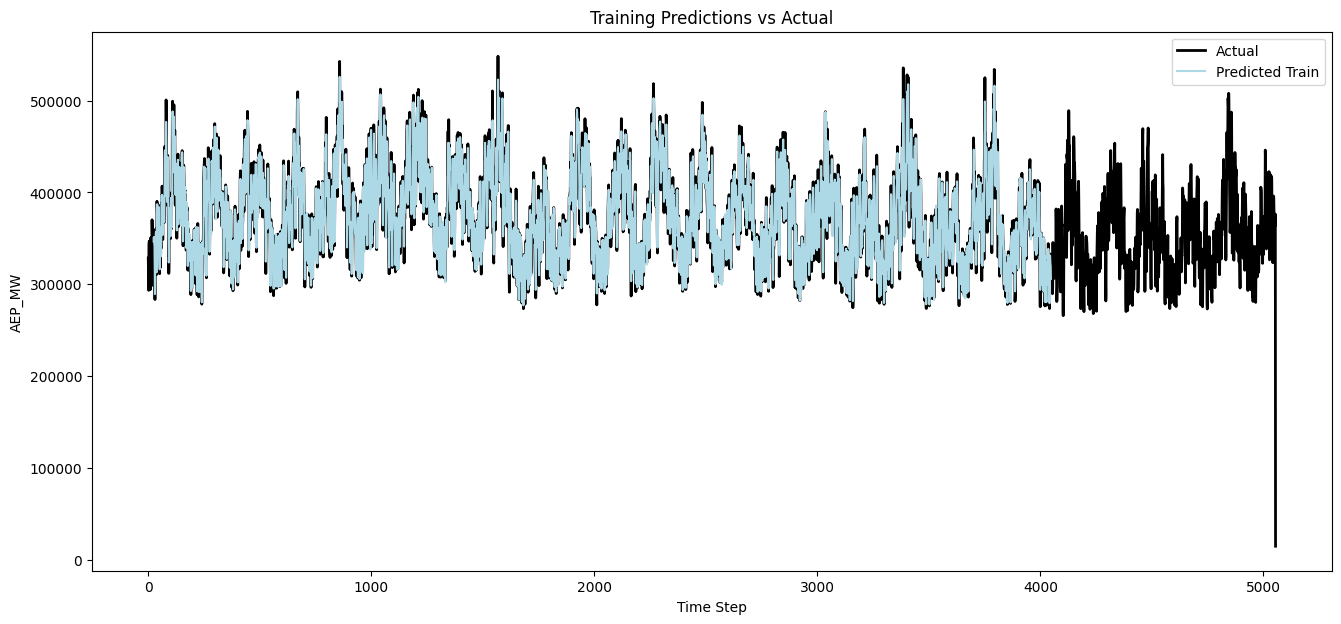

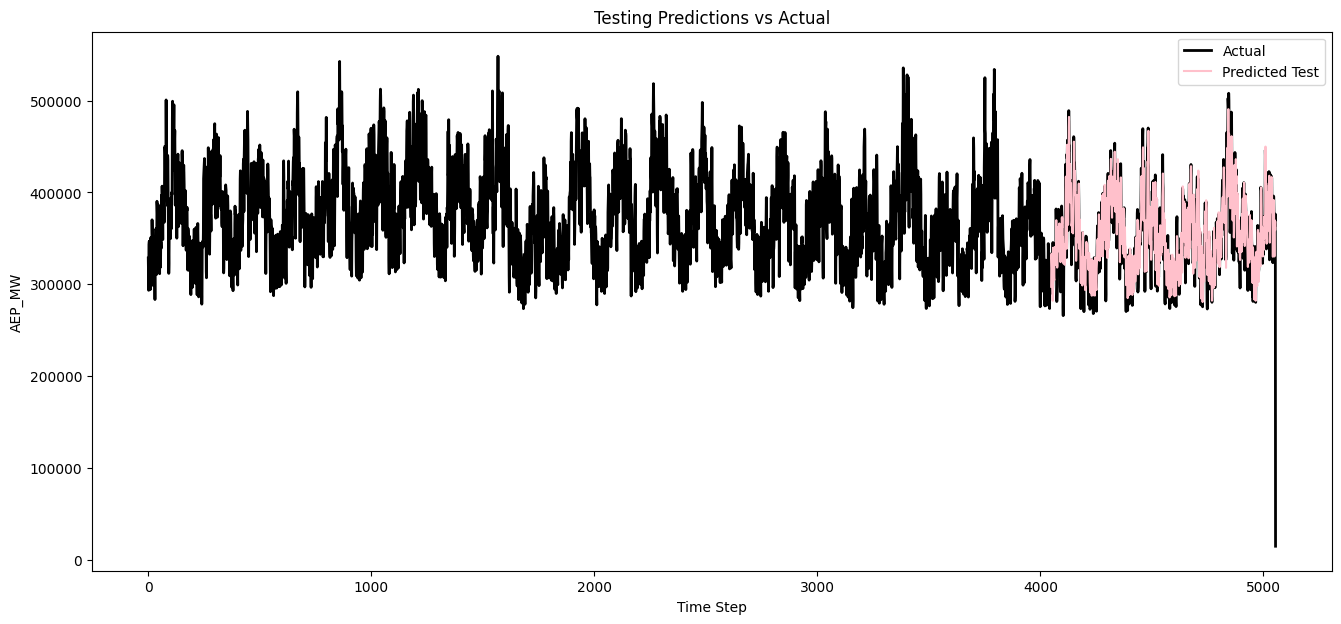

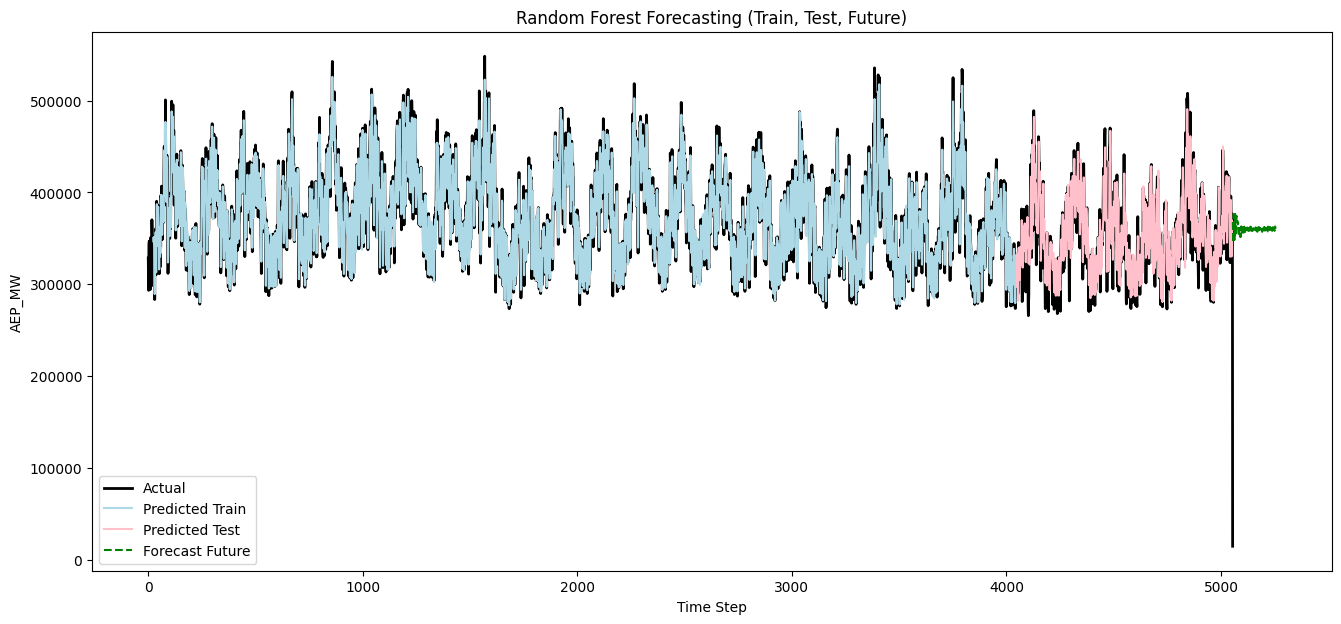

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from math import sqrt

# === 1. Ambil data ===
series = df_aep['AEP_MW'].dropna().values.reshape(-1, 1)

# Normalisasi (optional)
scaler = MinMaxScaler(feature_range=(0, 1))
series_scaled = scaler.fit_transform(series)

# === 2. Buat lag features ===
def create_dataset(data, lag=24):
    X, y = [], []
    for i in range(len(data) - lag):
        X.append(data[i:(i + lag), 0])
        y.append(data[i + lag, 0])
    return np.array(X), np.array(y)

lag = 24
X, y = create_dataset(series_scaled, lag)

# === 3. Train-Test Split ===
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# === 4. Model Random Forest ===
rf = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# === 5. Prediksi ===
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Balikin skala
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_train_pred_inv = scaler.inverse_transform(y_train_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_pred_inv = scaler.inverse_transform(y_test_pred.reshape(-1, 1))

# === 6. Hitung RMSE dan MAPE ===
rmse_train = sqrt(mean_squared_error(y_train_inv, y_train_pred_inv))
mape_train = np.mean(np.abs((y_train_inv - y_train_pred_inv) / y_train_inv)) * 100

rmse_test = sqrt(mean_squared_error(y_test_inv, y_test_pred_inv))
mape_test = np.mean(np.abs((y_test_inv - y_test_pred_inv) / y_test_inv)) * 100

print(f"RMSE Train: {rmse_train:.2f}, MAPE Train: {mape_train:.2f}%")
print(f"RMSE Test: {rmse_test:.2f}, MAPE Test: {mape_test:.2f}%")

# === 7. Forecast ke depan ===
future_steps = 200
last_input = X_test[-1]
pred_future = []

current_input = last_input.copy()
for _ in range(future_steps):
    next_val = rf.predict(current_input.reshape(1, -1))[0]
    pred_future.append(next_val)
    current_input = np.append(current_input[1:], next_val)

pred_future_inv = scaler.inverse_transform(np.array(pred_future).reshape(-1, 1))

# === 8. Tabel Data Aktual dan Prediksi ===
# Menggabungkan hasil pelatihan dan pengujian
results_train = pd.DataFrame({
    'Period': range(1, len(y_train_inv) + 1),
    'Actual': y_train_inv.flatten(),
    'Predicted': y_train_pred_inv.flatten()
})

results_test = pd.DataFrame({
    'Period': range(len(y_train_inv) + 1, len(y_train_inv) + len(y_test_inv) + 1),
    'Actual': y_test_inv.flatten(),
    'Predicted': y_test_pred_inv.flatten()
})

# Menggabungkan kedua tabel
results = pd.concat([results_train, results_test], ignore_index=True)

# Menampilkan tabel hasil lengkap
print("\n=== Tabel Hasil Lengkap ===")
print(results)

# === 9. Plot untuk training ===
plt.figure(figsize=(16, 7))
plt.plot(series, label='Actual', color='black', linewidth=2)
train_index = range(lag, lag + len(y_train))
plt.plot(train_index, y_train_pred_inv, label='Predicted Train', color='lightblue')
plt.title("Training Predictions vs Actual")
plt.xlabel("Time Step")
plt.ylabel("AEP_MW")
plt.legend()
plt.show()

# === 10. Plot untuk testing ===
plt.figure(figsize=(16, 7))
plt.plot(series, label='Actual', color='black', linewidth=2)
test_index = range(lag + len(y_train), lag + len(y_train) + len(y_test))
plt.plot(test_index, y_test_pred_inv, label='Predicted Test', color='pink')
plt.title("Testing Predictions vs Actual")
plt.xlabel("Time Step")
plt.ylabel("AEP_MW")
plt.legend()
plt.show()

# === 11. Plot gabungan ===
plt.figure(figsize=(16, 7))
plt.plot(series, label='Actual', color='black', linewidth=2)
plt.plot(train_index, y_train_pred_inv, label='Predicted Train', color='lightblue')
plt.plot(test_index, y_test_pred_inv, label='Predicted Test', color='pink')
future_index = range(lag + len(y_train) + len(y_test), lag + len(y_train) + len(y_test) + future_steps)
plt.plot(future_index, pred_future_inv, label='Forecast Future', color='green', linestyle='--')
plt.title("Random Forest Forecasting (Train, Test, Future)")
plt.xlabel("Time Step")
plt.ylabel("AEP_MW")
plt.legend()
plt.show()

## Forecasting per hari

RMSE Train: 12774.51, MAPE Train: 2.71%
RMSE Test: 30446.22, MAPE Test: 8.66%

=== Tabel Hasil Lengkap ===
      Period    Actual      Predicted
0          1  311997.0  319347.547814
1          2  293450.0  302670.393118
2          3  343417.0  335964.119823
3          4  346553.0  346972.199552
4          5  346195.0  339591.102074
...      ...       ...            ...
5049    5050  368834.0  322946.572103
5050    5051  364327.0  359463.129962
5051    5052  363628.0  347745.001908
5052    5053  376504.0  370664.052257
5053    5054   14809.0  369806.890229

[5054 rows x 3 columns]


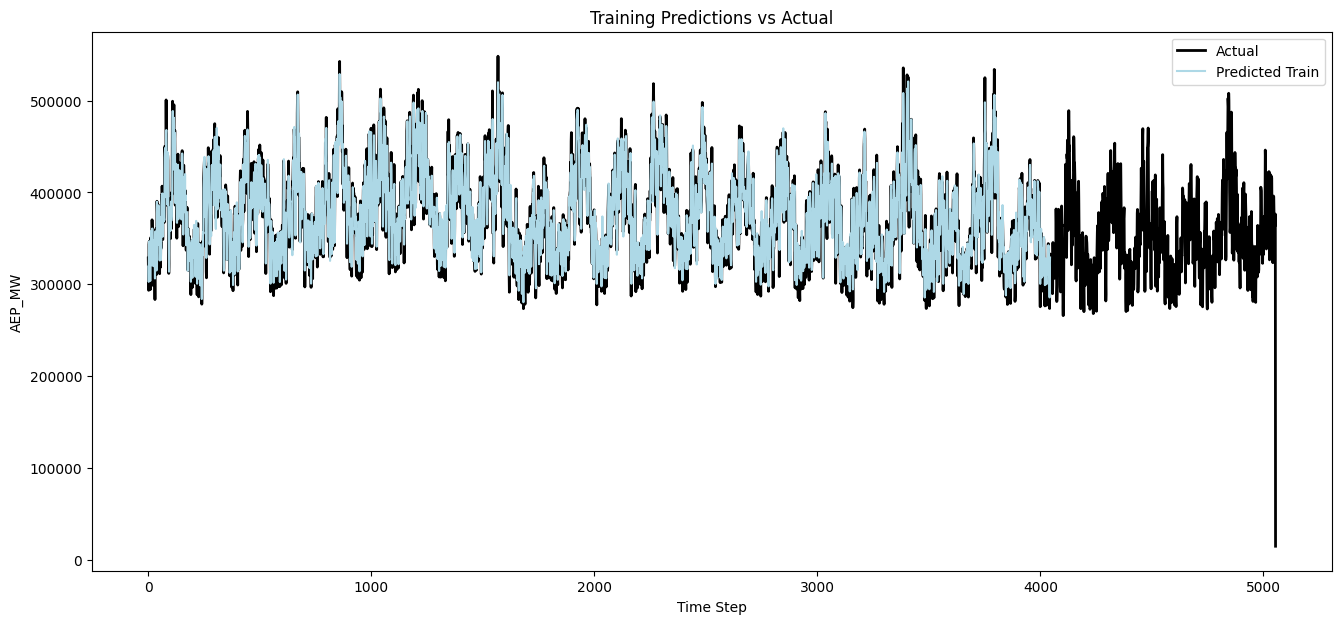

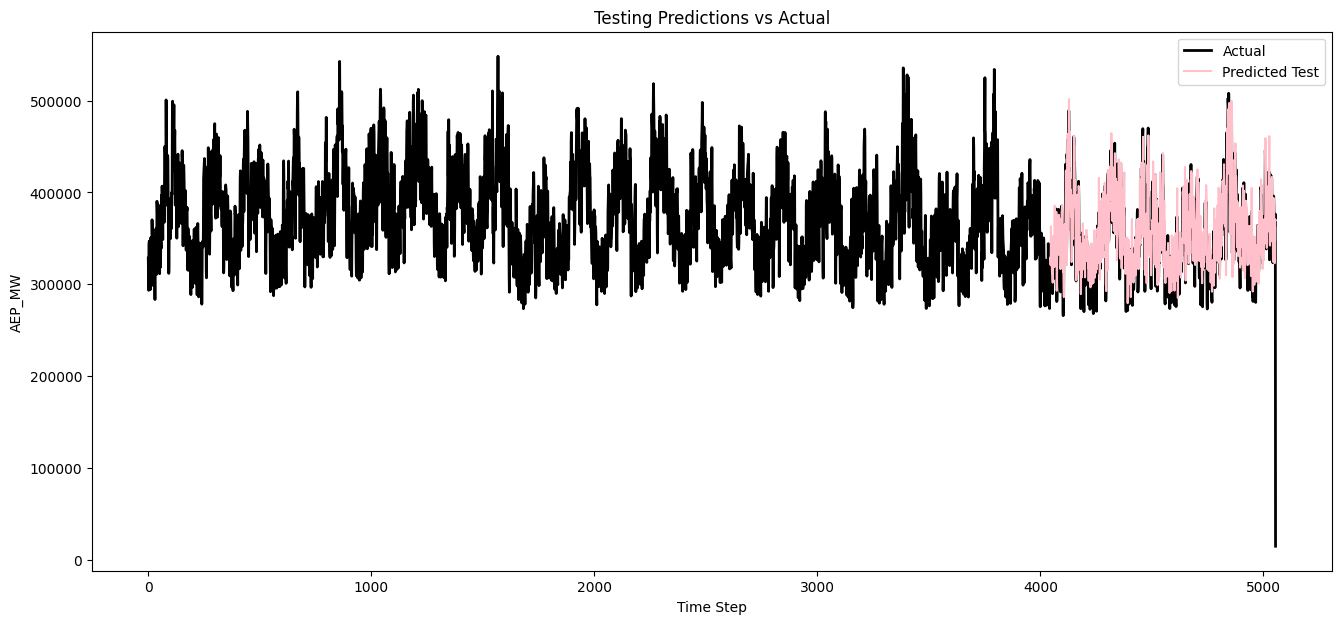

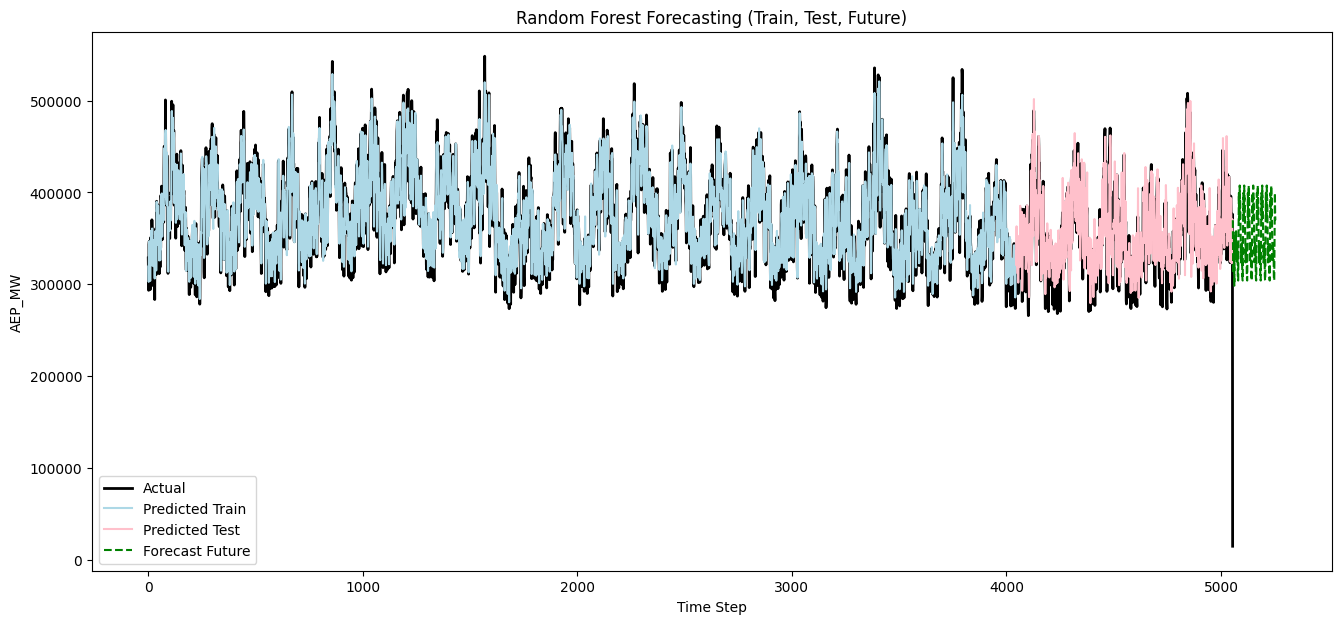

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from math import sqrt

# === 1. Ambil data ===
series = df_aep['AEP_MW'].dropna().values.reshape(-1, 1)

# Normalisasi (optional)
scaler = MinMaxScaler(feature_range=(0, 1))
series_scaled = scaler.fit_transform(series)

# === 2. Buat lag features untuk har ===
def create_dataset(data, lag=1):  # Lag diubah sesuai dengan prediksi harian
    X, y = [], []
    for i in range(len(data) - lag):
        X.append(data[i:(i + lag), 0])
        y.append(data[i + lag, 0])
    return np.array(X), np.array(y)

lag = 1  # Ganti sesuai dengan data harian, gunakan lag 1 jika menginginkan prediksi harian langsung
X, y = create_dataset(series_scaled, lag=1)

# === 3. Train-Test Split ===
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# === 4. Model Random Forest ===
rf = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# === 5. Prediksi ===
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Balikin skala
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_train_pred_inv = scaler.inverse_transform(y_train_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_pred_inv = scaler.inverse_transform(y_test_pred.reshape(-1, 1))

# === 6. Hitung RMSE dan MAPE ===
rmse_train = sqrt(mean_squared_error(y_train_inv, y_train_pred_inv))
mape_train = np.mean(np.abs((y_train_inv - y_train_pred_inv) / y_train_inv)) * 100

rmse_test = sqrt(mean_squared_error(y_test_inv, y_test_pred_inv))
mape_test = np.mean(np.abs((y_test_inv - y_test_pred_inv) / y_test_inv)) * 100

print(f"RMSE Train: {rmse_train:.2f}, MAPE Train: {mape_train:.2f}%")
print(f"RMSE Test: {rmse_test:.2f}, MAPE Test: {mape_test:.2f}%")

# === 7. Forecast ke depan ===
future_steps = 200
last_input = X_test[-1]
pred_future = []

current_input = last_input.copy()
for _ in range(future_steps):
    next_val = rf.predict(current_input.reshape(1, -1))[0]
    pred_future.append(next_val)
    current_input = np.append(current_input[1:], next_val)

pred_future_inv = scaler.inverse_transform(np.array(pred_future).reshape(-1, 1))

# === 8. Tabel Data Aktual dan Prediksi ===
# Menggabungkan hasil pelatihan dan pengujian
results_train = pd.DataFrame({
    'Period': range(1, len(y_train_inv) + 1),
    'Actual': y_train_inv.flatten(),
    'Predicted': y_train_pred_inv.flatten()
})

results_test = pd.DataFrame({
    'Period': range(len(y_train_inv) + 1, len(y_train_inv) + len(y_test_inv) + 1),
    'Actual': y_test_inv.flatten(),
    'Predicted': y_test_pred_inv.flatten()
})

# Menggabungkan kedua tabel
results = pd.concat([results_train, results_test], ignore_index=True)

# Menampilkan tabel hasil lengkap
print("\n=== Tabel Hasil Lengkap ===")
print(results)

# === 9. Plot untuk training ===
plt.figure(figsize=(16, 7))
plt.plot(series, label='Actual', color='black', linewidth=2)
train_index = range(lag, lag + len(y_train))
plt.plot(train_index, y_train_pred_inv, label='Predicted Train', color='lightblue')
plt.title("Training Predictions vs Actual")
plt.xlabel("Time Step")
plt.ylabel("AEP_MW")
plt.legend()
plt.show()

# === 10. Plot untuk testing ===
plt.figure(figsize=(16, 7))
plt.plot(series, label='Actual', color='black', linewidth=2)
test_index = range(lag + len(y_train), lag + len(y_train) + len(y_test))
plt.plot(test_index, y_test_pred_inv, label='Predicted Test', color='pink')
plt.title("Testing Predictions vs Actual")
plt.xlabel("Time Step")
plt.ylabel("AEP_MW")
plt.legend()
plt.show()

# === 11. Plot gabungan ===
plt.figure(figsize=(16, 7))
plt.plot(series, label='Actual', color='black', linewidth=2)
plt.plot(train_index, y_train_pred_inv, label='Predicted Train', color='lightblue')
plt.plot(test_index, y_test_pred_inv, label='Predicted Test', color='pink')
future_index = range(lag + len(y_train) + len(y_test), lag + len(y_train) + len(y_test) + future_steps)
plt.plot(future_index, pred_future_inv, label='Forecast Future', color='green', linestyle='--')
plt.title("Random Forest Forecasting (Train, Test, Future)")
plt.xlabel("Time Step")
plt.ylabel("AEP_MW")
plt.legend()
plt.show()

## Forecasting per minggu

RMSE Train: 7906.00, MAPE Train: 1.54%
RMSE Test: 24785.75, MAPE Test: 7.18%

=== Tabel Hasil Lengkap ===
      Period    Actual      Predicted
0          1  344408.0  342390.383250
1          2  310429.0  311046.480595
2          3  294249.0  294504.002738
3          4  343194.0  341246.961795
4          5  350758.0  349280.656531
...      ...       ...            ...
5043    5044  368834.0  369292.969055
5044    5045  364327.0  371576.317228
5045    5046  363628.0  364698.521198
5046    5047  376504.0  358326.160394
5047    5048   14809.0  372396.445015

[5048 rows x 3 columns]


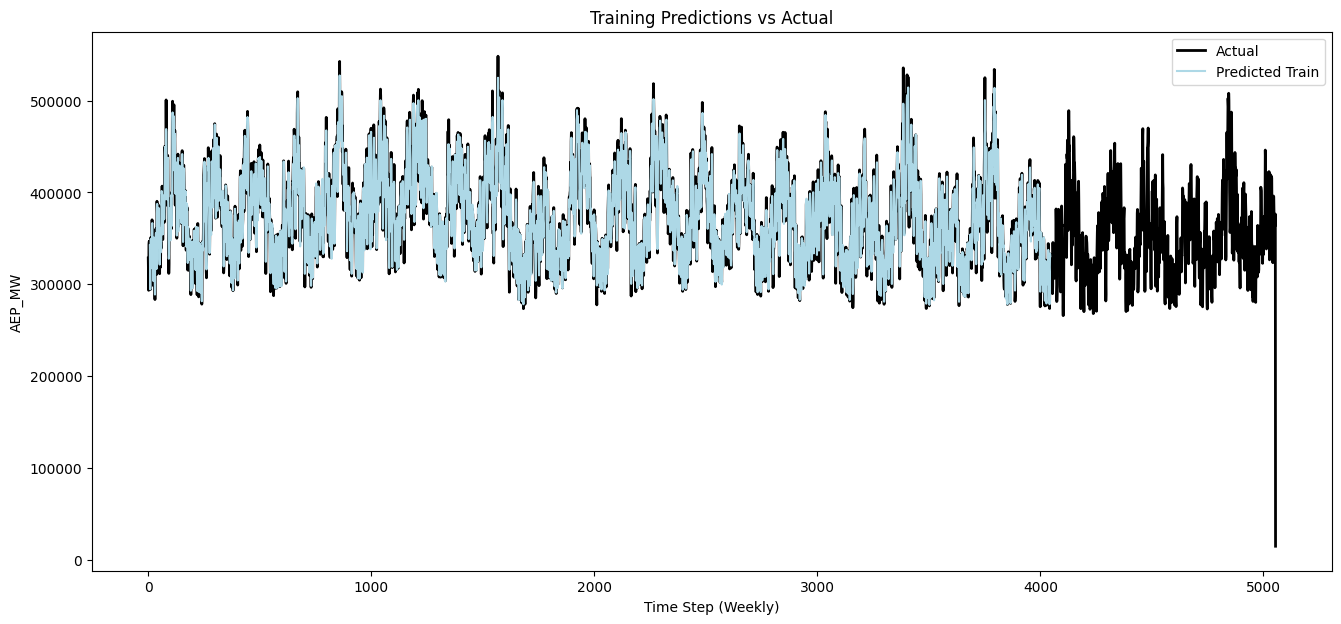

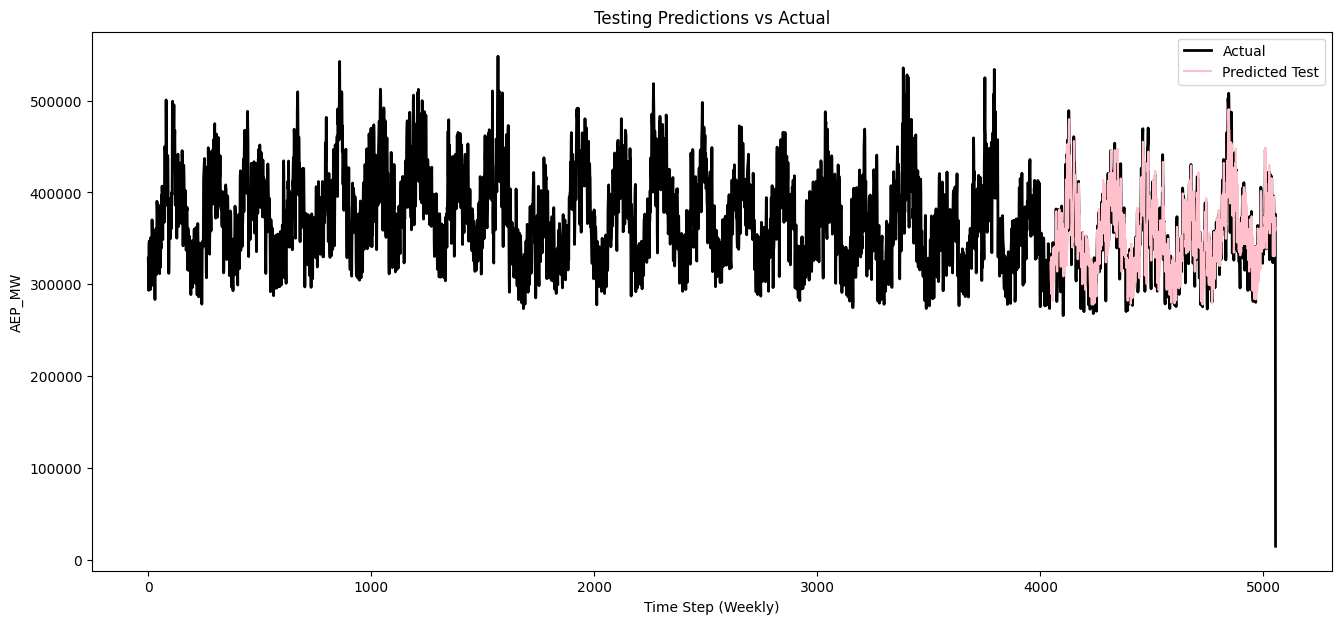

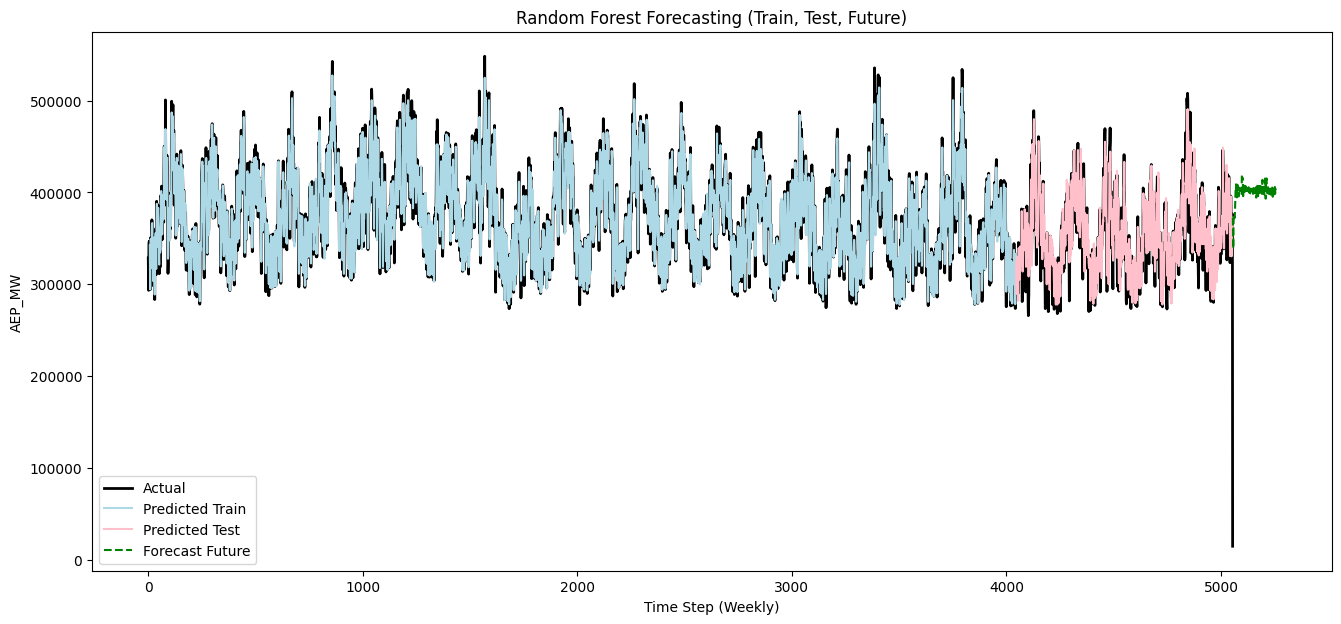

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from math import sqrt

# === 1. Ambil data ===
series = df_aep['AEP_MW'].dropna().values.reshape(-1, 1)

# Normalisasi (optional)
scaler = MinMaxScaler(feature_range=(0, 1))
series_scaled = scaler.fit_transform(series)

# === 2. Buat lag features untuk mingguan ===
def create_dataset(data, lag=7):  # Lag diatur menjadi 7 untuk prediksi mingguan
    X, y = [], []
    for i in range(len(data) - lag):
        X.append(data[i:(i + lag), 0])
        y.append(data[i + lag, 0])
    return np.array(X), np.array(y)

lag = 7  # Menggunakan lag 7 untuk data mingguan
X, y = create_dataset(series_scaled, lag)

# === 3. Train-Test Split ===
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# === 4. Model Random Forest ===
rf = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# === 5. Prediksi ===
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Balikin skala
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_train_pred_inv = scaler.inverse_transform(y_train_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_pred_inv = scaler.inverse_transform(y_test_pred.reshape(-1, 1))

# === 6. Hitung RMSE dan MAPE ===
rmse_train = sqrt(mean_squared_error(y_train_inv, y_train_pred_inv))
mape_train = np.mean(np.abs((y_train_inv - y_train_pred_inv) / y_train_inv)) * 100

rmse_test = sqrt(mean_squared_error(y_test_inv, y_test_pred_inv))
mape_test = np.mean(np.abs((y_test_inv - y_test_pred_inv) / y_test_inv)) * 100

print(f"RMSE Train: {rmse_train:.2f}, MAPE Train: {mape_train:.2f}%")
print(f"RMSE Test: {rmse_test:.2f}, MAPE Test: {mape_test:.2f}%")

# === 7. Forecast ke depan ===
future_steps = 200
last_input = X_test[-1]
pred_future = []

current_input = last_input.copy()
for _ in range(future_steps):
    next_val = rf.predict(current_input.reshape(1, -1))[0]
    pred_future.append(next_val)
    current_input = np.append(current_input[1:], next_val)

pred_future_inv = scaler.inverse_transform(np.array(pred_future).reshape(-1, 1))

# === 8. Tabel Data Aktual dan Prediksi ===
# Menggabungkan hasil pelatihan dan pengujian
results_train = pd.DataFrame({
    'Period': range(1, len(y_train_inv) + 1),
    'Actual': y_train_inv.flatten(),
    'Predicted': y_train_pred_inv.flatten()
})

results_test = pd.DataFrame({
    'Period': range(len(y_train_inv) + 1, len(y_train_inv) + len(y_test_inv) + 1),
    'Actual': y_test_inv.flatten(),
    'Predicted': y_test_pred_inv.flatten()
})

# Menggabungkan kedua tabel
results = pd.concat([results_train, results_test], ignore_index=True)

# Menampilkan tabel hasil lengkap
print("\n=== Tabel Hasil Lengkap ===")
print(results)

# === 9. Plot untuk training ===
plt.figure(figsize=(16, 7))
plt.plot(series, label='Actual', color='black', linewidth=2)
train_index = range(lag, lag + len(y_train))
plt.plot(train_index, y_train_pred_inv, label='Predicted Train', color='lightblue')
plt.title("Training Predictions vs Actual")
plt.xlabel("Time Step (Weekly)")
plt.ylabel("AEP_MW")
plt.legend()
plt.show()

# === 10. Plot untuk testing ===
plt.figure(figsize=(16, 7))
plt.plot(series, label='Actual', color='black', linewidth=2)
test_index = range(lag + len(y_train), lag + len(y_train) + len(y_test))
plt.plot(test_index, y_test_pred_inv, label='Predicted Test', color='pink')
plt.title("Testing Predictions vs Actual")
plt.xlabel("Time Step (Weekly)")
plt.ylabel("AEP_MW")
plt.legend()
plt.show()

# === 11. Plot gabungan ===
plt.figure(figsize=(16, 7))
plt.plot(series, label='Actual', color='black', linewidth=2)
plt.plot(train_index, y_train_pred_inv, label='Predicted Train', color='lightblue')
plt.plot(test_index, y_test_pred_inv, label='Predicted Test', color='pink')
future_index = range(lag + len(y_train) + len(y_test), lag + len(y_train) + len(y_test) + future_steps)
plt.plot(future_index, pred_future_inv, label='Forecast Future', color='green', linestyle='--')
plt.title("Random Forest Forecasting (Train, Test, Future)")
plt.xlabel("Time Step (Weekly)")
plt.ylabel("AEP_MW")
plt.legend()
plt.show()

# XGBoost Forecasting

## Forecasting per jam

RMSE Train: 212.22, MAPE Train: 0.04%
RMSE Test: 25096.73, MAPE Test: 7.37%

=== Tabel Hasil Lengkap ===
      Period    Actual     Predicted
0          1  347439.0  347380.78125
1          2  351691.0  351616.09375
2          3  346772.0  347219.59375
3          4  343864.0  344164.25000
4          5  342247.0  342129.06250
...      ...       ...           ...
5026    5027  368834.0  364778.06250
5027    5028  364327.0  373145.59375
5028    5029  363628.0  348744.56250
5029    5030  376504.0  357913.37500
5030    5031   14809.0  370634.25000

[5031 rows x 3 columns]


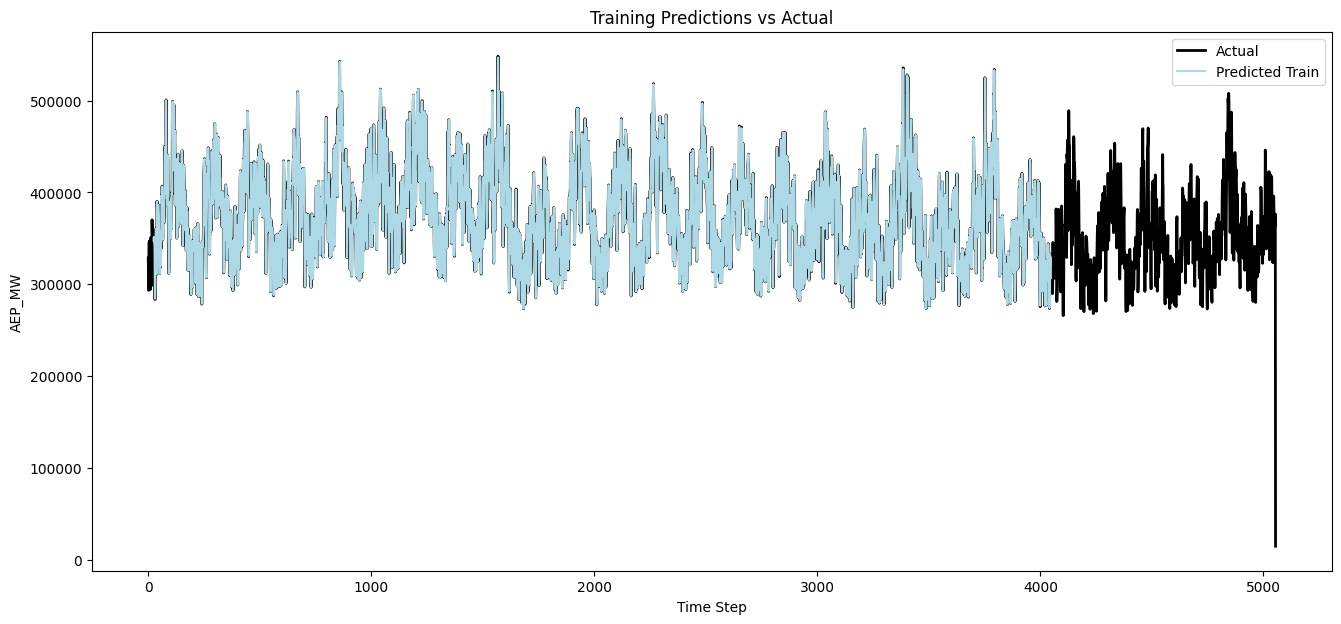

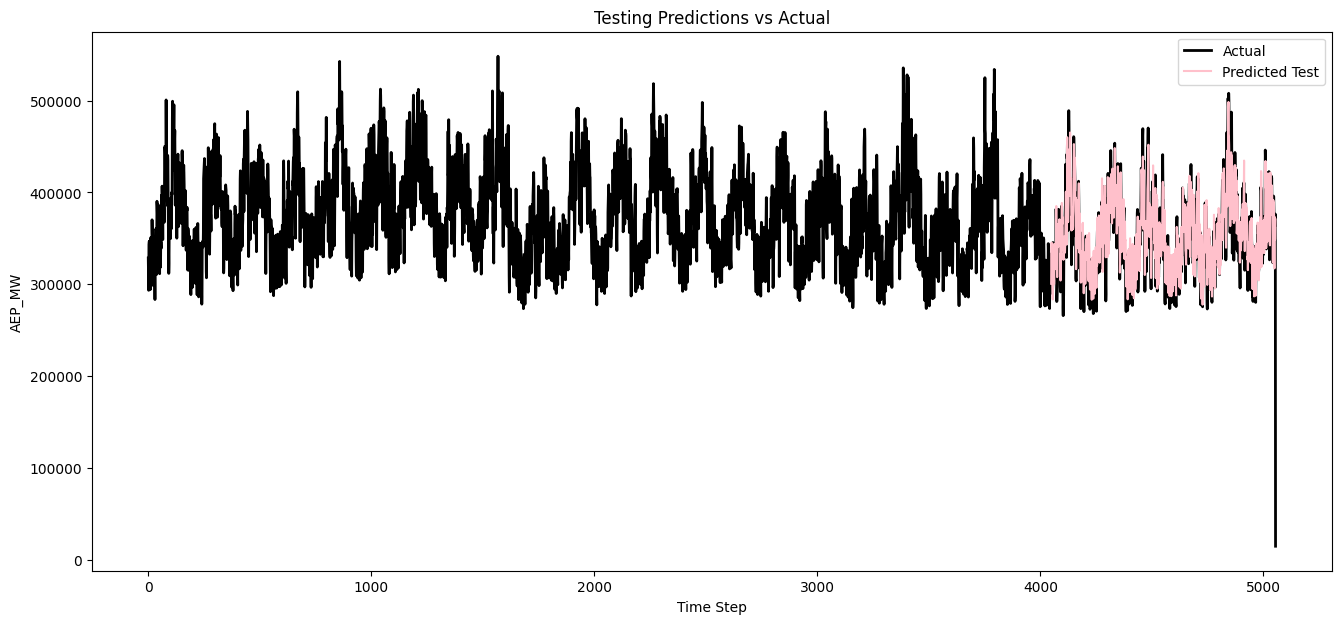

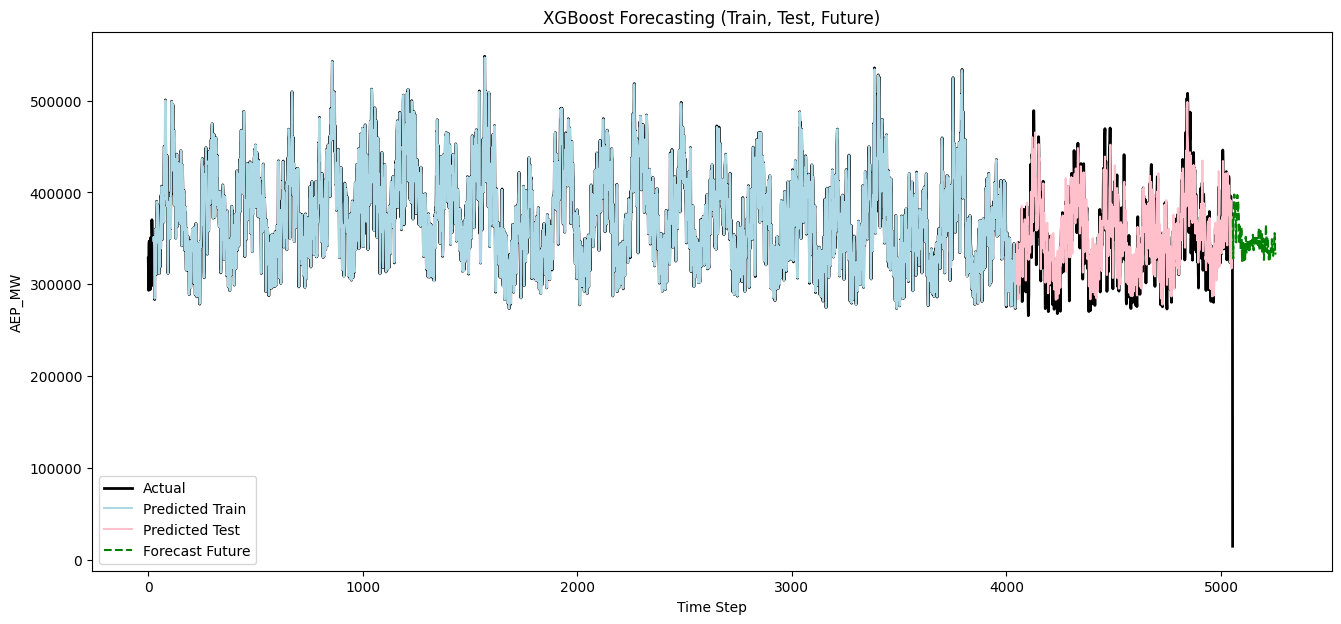

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from math import sqrt

# === 1. Ambil data ===
series = df_aep['AEP_MW'].dropna().values.reshape(-1, 1)

# Normalisasi (optional)
scaler = MinMaxScaler(feature_range=(0, 1))
series_scaled = scaler.fit_transform(series)

# === 2. Buat lag features ===
def create_dataset(data, lag=24):
    X, y = [], []
    for i in range(len(data) - lag):
        X.append(data[i:(i + lag), 0])
        y.append(data[i + lag, 0])
    return np.array(X), np.array(y)

lag = 24
X, y = create_dataset(series_scaled, lag)

# === 3. Train-Test Split ===
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# === 4. Model XGBoost ===
model = XGBRegressor(n_estimators=200, max_depth=20, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# === 5. Prediksi ===
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Balikin skala
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_train_pred_inv = scaler.inverse_transform(y_train_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_pred_inv = scaler.inverse_transform(y_test_pred.reshape(-1, 1))

# === 6. Hitung RMSE dan MAPE ===
rmse_train = sqrt(mean_squared_error(y_train_inv, y_train_pred_inv))
mape_train = np.mean(np.abs((y_train_inv - y_train_pred_inv) / y_train_inv)) * 100

rmse_test = sqrt(mean_squared_error(y_test_inv, y_test_pred_inv))
mape_test = np.mean(np.abs((y_test_inv - y_test_pred_inv) / y_test_inv)) * 100

print(f"RMSE Train: {rmse_train:.2f}, MAPE Train: {mape_train:.2f}%")
print(f"RMSE Test: {rmse_test:.2f}, MAPE Test: {mape_test:.2f}%")

# === 7. Forecast ke depan ===
future_steps = 200
last_input = X_test[-1]
pred_future = []

current_input = last_input.copy()
for _ in range(future_steps):
    next_val = model.predict(current_input.reshape(1, -1))[0]
    pred_future.append(next_val)
    current_input = np.append(current_input[1:], next_val)

pred_future_inv = scaler.inverse_transform(np.array(pred_future).reshape(-1, 1))

# === 8. Tabel Data Aktual dan Prediksi ===
# Menggabungkan hasil pelatihan dan pengujian
results_train = pd.DataFrame({
    'Period': range(1, len(y_train_inv) + 1),
    'Actual': y_train_inv.flatten(),
    'Predicted': y_train_pred_inv.flatten()
})

results_test = pd.DataFrame({
    'Period': range(len(y_train_inv) + 1, len(y_train_inv) + len(y_test_inv) + 1),
    'Actual': y_test_inv.flatten(),
    'Predicted': y_test_pred_inv.flatten()
})

# Menggabungkan kedua tabel
results = pd.concat([results_train, results_test], ignore_index=True)

# Menampilkan tabel hasil lengkap
print("\n=== Tabel Hasil Lengkap ===")
print(results)

# === 9. Plot untuk training ===
plt.figure(figsize=(16, 7))
plt.plot(series, label='Actual', color='black', linewidth=2)
train_index = range(lag, lag + len(y_train))
plt.plot(train_index, y_train_pred_inv, label='Predicted Train', color='lightblue')
plt.title("Training Predictions vs Actual")
plt.xlabel("Time Step")
plt.ylabel("AEP_MW")
plt.legend()
plt.show()

# === 10. Plot untuk testing ===
plt.figure(figsize=(16, 7))
plt.plot(series, label='Actual', color='black', linewidth=2)
test_index = range(lag + len(y_train), lag + len(y_train) + len(y_test))
plt.plot(test_index, y_test_pred_inv, label='Predicted Test', color='pink')
plt.title("Testing Predictions vs Actual")
plt.xlabel("Time Step")
plt.ylabel("AEP_MW")
plt.legend()
plt.show()

# === 11. Plot gabungan ===
plt.figure(figsize=(16, 7))
plt.plot(series, label='Actual', color='black', linewidth=2)
plt.plot(train_index, y_train_pred_inv, label='Predicted Train', color='lightblue')
plt.plot(test_index, y_test_pred_inv, label='Predicted Test', color='pink')
future_index = range(lag + len(y_train) + len(y_test), lag + len(y_train) + len(y_test) + future_steps)
plt.plot(future_index, pred_future_inv, label='Forecast Future', color='green', linestyle='--')
plt.title("XGBoost Forecasting (Train, Test, Future)")
plt.xlabel("Time Step")
plt.ylabel("AEP_MW")
plt.legend()
plt.show()

## Forecasting per hari

RMSE Train: 24497.07, MAPE Train: 5.12%
RMSE Test: 27080.38, MAPE Test: 7.99%

=== Tabel Hasil Lengkap ===
      Period    Actual     Predicted
0          1  311997.0  322368.21875
1          2  293450.0  323136.50000
2          3  343417.0  323207.84375
3          4  346553.0  346961.65625
4          5  346195.0  347214.46875
...      ...       ...           ...
5049    5050  368834.0  325087.50000
5050    5051  364327.0  366155.68750
5051    5052  363628.0  358855.93750
5052    5053  376504.0  362691.93750
5053    5054   14809.0  386187.09375

[5054 rows x 3 columns]


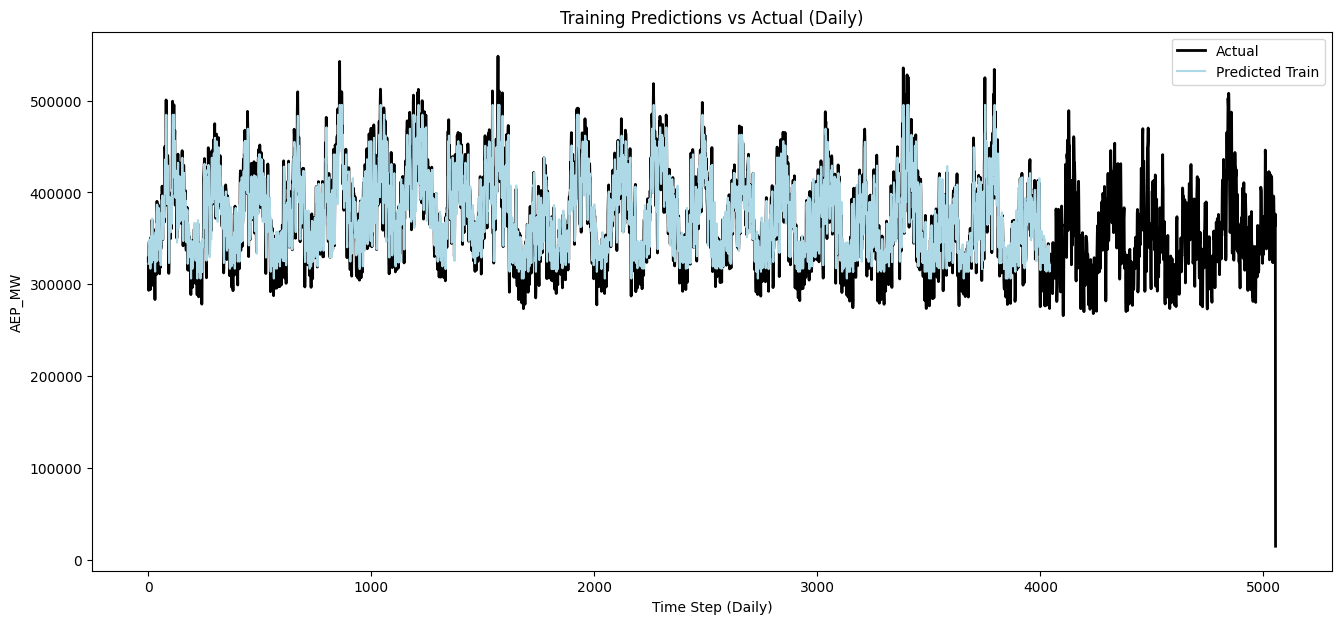

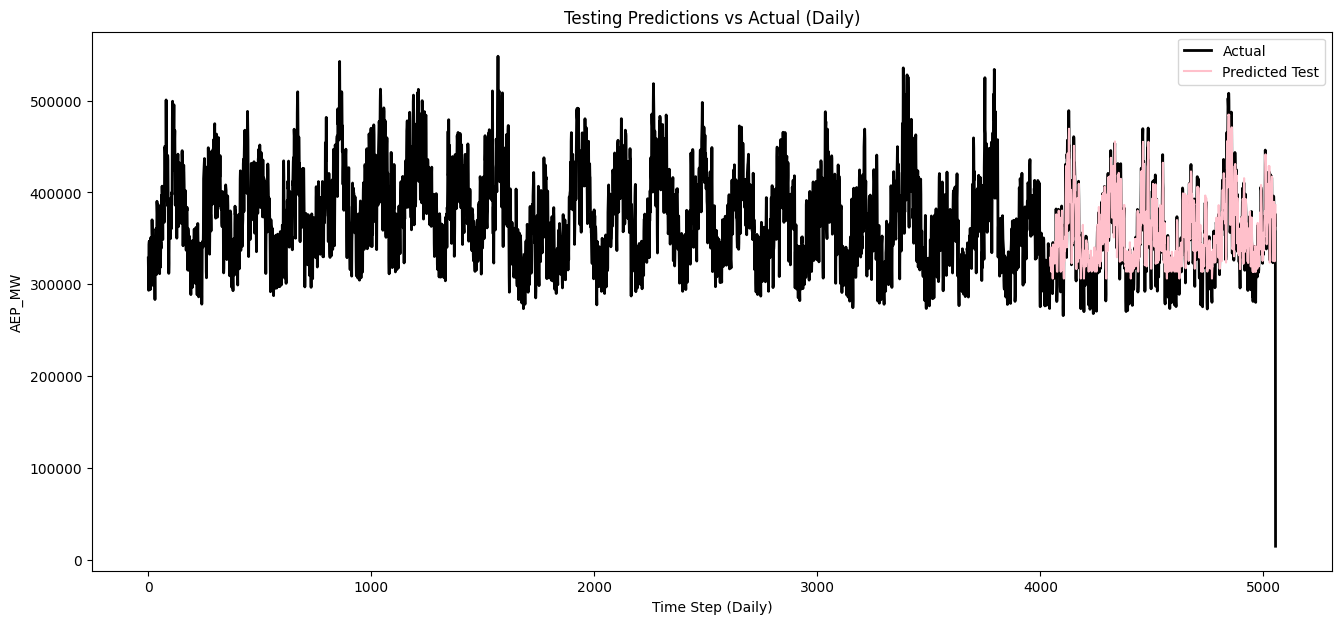

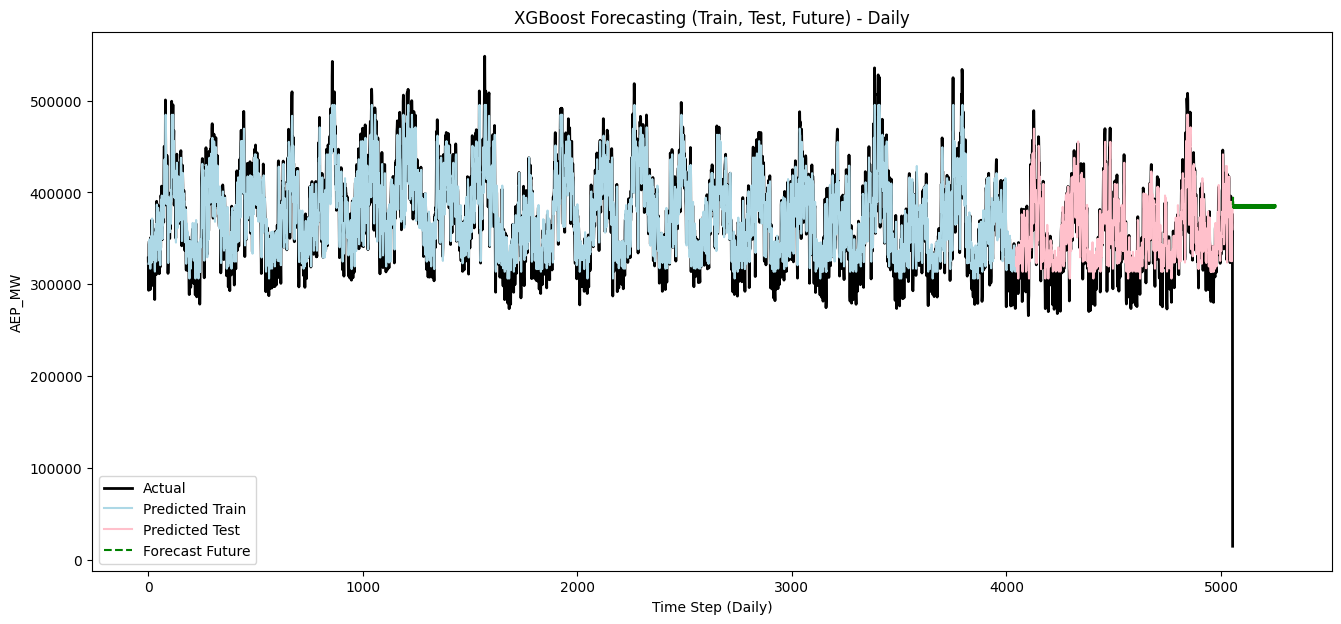

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from math import sqrt

# === 1. Ambil data ===
series = df_aep['AEP_MW'].dropna().values.reshape(-1, 1)

# Normalisasi (optional)
scaler = MinMaxScaler(feature_range=(0, 1))
series_scaled = scaler.fit_transform(series)

# === 2. Buat lag features untuk har ===
def create_dataset(data, lag=1):  # Lag diatur menjadi 1 untuk prediksi harian
    X, y = [], []
    for i in range(len(data) - lag):
        X.append(data[i:(i + lag), 0])
        y.append(data[i + lag, 0])
    return np.array(X), np.array(y)

lag = 1  # Menggunakan lag 1 untuk data harian
X, y = create_dataset(series_scaled, lag)

# === 3. Train-Test Split ===
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# === 4. Model XGBoost ===
model = XGBRegressor(n_estimators=200, max_depth=20, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# === 5. Prediksi ===
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Balikin skala
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_train_pred_inv = scaler.inverse_transform(y_train_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_pred_inv = scaler.inverse_transform(y_test_pred.reshape(-1, 1))

# === 6. Hitung RMSE dan MAPE ===
rmse_train = sqrt(mean_squared_error(y_train_inv, y_train_pred_inv))
mape_train = np.mean(np.abs((y_train_inv - y_train_pred_inv) / y_train_inv)) * 100

rmse_test = sqrt(mean_squared_error(y_test_inv, y_test_pred_inv))
mape_test = np.mean(np.abs((y_test_inv - y_test_pred_inv) / y_test_inv)) * 100

print(f"RMSE Train: {rmse_train:.2f}, MAPE Train: {mape_train:.2f}%")
print(f"RMSE Test: {rmse_test:.2f}, MAPE Test: {mape_test:.2f}%")

# === 7. Forecast ke depan ===
future_steps = 200
last_input = X_test[-1]
pred_future = []

current_input = last_input.copy()
for _ in range(future_steps):
    next_val = model.predict(current_input.reshape(1, -1))[0]
    pred_future.append(next_val)
    current_input = np.append(current_input[1:], next_val)

pred_future_inv = scaler.inverse_transform(np.array(pred_future).reshape(-1, 1))

# === 8. Tabel Data Aktual dan Prediksi ===
# Menggabungkan hasil pelatihan dan pengujian
results_train = pd.DataFrame({
    'Period': range(1, len(y_train_inv) + 1),
    'Actual': y_train_inv.flatten(),
    'Predicted': y_train_pred_inv.flatten()
})

results_test = pd.DataFrame({
    'Period': range(len(y_train_inv) + 1, len(y_train_inv) + len(y_test_inv) + 1),
    'Actual': y_test_inv.flatten(),
    'Predicted': y_test_pred_inv.flatten()
})

# Menggabungkan kedua tabel
results = pd.concat([results_train, results_test], ignore_index=True)

# Menampilkan tabel hasil lengkap
print("\n=== Tabel Hasil Lengkap ===")
print(results)

# === 9. Plot untuk training ===
plt.figure(figsize=(16, 7))
plt.plot(series, label='Actual', color='black', linewidth=2)
train_index = range(lag, lag + len(y_train))
plt.plot(train_index, y_train_pred_inv, label='Predicted Train', color='lightblue')
plt.title("Training Predictions vs Actual (Daily)")
plt.xlabel("Time Step (Daily)")
plt.ylabel("AEP_MW")
plt.legend()
plt.show()

# === 10. Plot untuk testing ===
plt.figure(figsize=(16, 7))
plt.plot(series, label='Actual', color='black', linewidth=2)
test_index = range(lag + len(y_train), lag + len(y_train) + len(y_test))
plt.plot(test_index, y_test_pred_inv, label='Predicted Test', color='pink')
plt.title("Testing Predictions vs Actual (Daily)")
plt.xlabel("Time Step (Daily)")
plt.ylabel("AEP_MW")
plt.legend()
plt.show()

# === 11. Plot gabungan ===
plt.figure(figsize=(16, 7))
plt.plot(series, label='Actual', color='black', linewidth=2)
plt.plot(train_index, y_train_pred_inv, label='Predicted Train', color='lightblue')
plt.plot(test_index, y_test_pred_inv, label='Predicted Test', color='pink')
future_index = range(lag + len(y_train) + len(y_test), lag + len(y_train) + len(y_test) + future_steps)
plt.plot(future_index, pred_future_inv, label='Forecast Future', color='green', linestyle='--')
plt.title("XGBoost Forecasting (Train, Test, Future) - Daily")
plt.xlabel("Time Step (Daily)")
plt.ylabel("AEP_MW")
plt.legend()
plt.show()

## Forecasting per minggu

RMSE Train: 296.25, MAPE Train: 0.06%
RMSE Test: 26617.64, MAPE Test: 7.68%

=== Tabel Hasil Lengkap ===
      Period    Actual     Predicted
0          1  344408.0  344089.62500
1          2  310429.0  310698.50000
2          3  294249.0  293966.21875
3          4  343194.0  342891.06250
4          5  350758.0  350492.40625
...      ...       ...           ...
5043    5044  368834.0  373956.28125
5044    5045  364327.0  371027.09375
5045    5046  363628.0  355505.18750
5046    5047  376504.0  362904.25000
5047    5048   14809.0  370744.65625

[5048 rows x 3 columns]


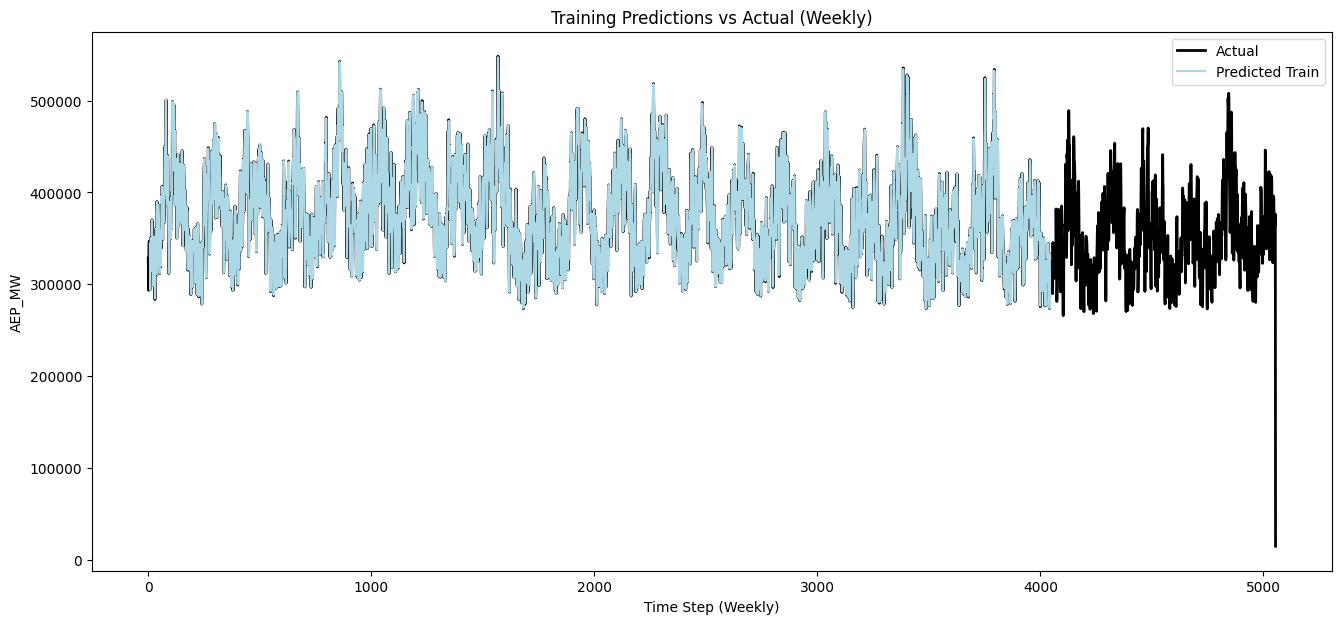

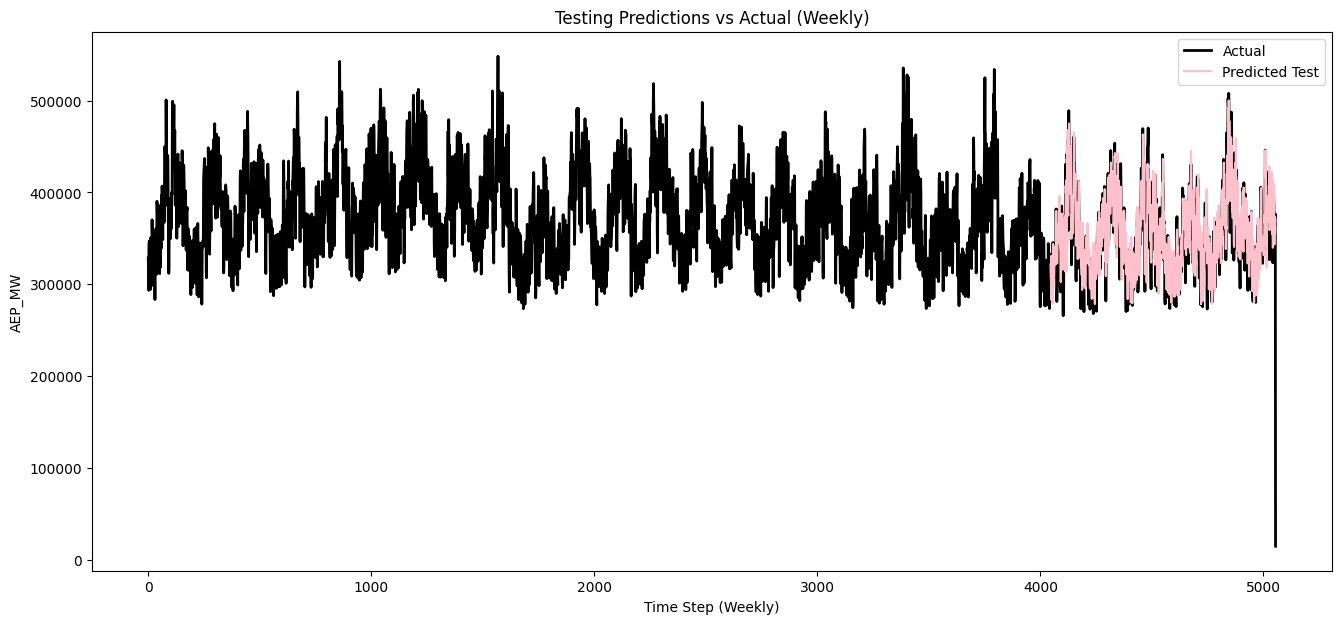

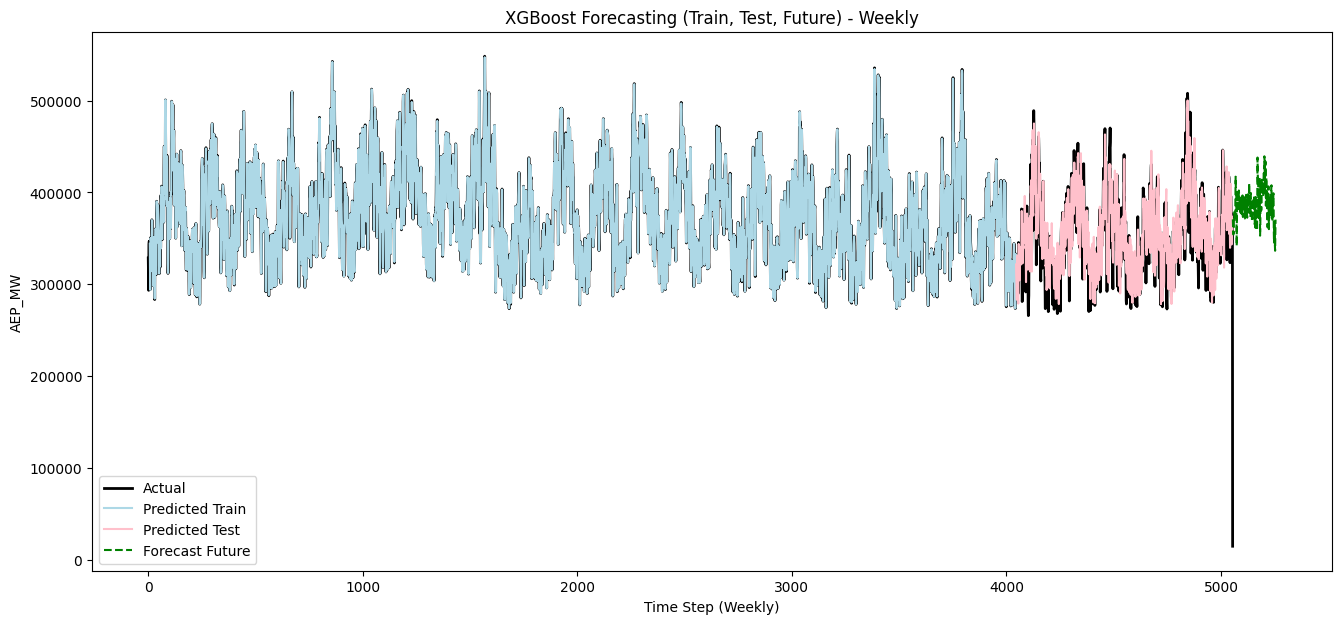

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from math import sqrt

# === 1. Ambil data ===
series = df_aep['AEP_MW'].dropna().values.reshape(-1, 1)

# Normalisasi (optional)
scaler = MinMaxScaler(feature_range=(0, 1))
series_scaled = scaler.fit_transform(series)

# === 2. Buat lag features untuk mingguan ===
def create_dataset(data, lag=7):  # Lag diatur menjadi 7 untuk prediksi mingguan
    X, y = [], []
    for i in range(len(data) - lag):
        X.append(data[i:(i + lag), 0])
        y.append(data[i + lag, 0])
    return np.array(X), np.array(y)

lag = 7  # Menggunakan lag 7 untuk data mingguan
X, y = create_dataset(series_scaled, lag)

# === 3. Train-Test Split ===
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# === 4. Model XGBoost ===
model = XGBRegressor(n_estimators=200, max_depth=20, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# === 5. Prediksi ===
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Balikin skala
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_train_pred_inv = scaler.inverse_transform(y_train_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_pred_inv = scaler.inverse_transform(y_test_pred.reshape(-1, 1))

# === 6. Hitung RMSE dan MAPE ===
rmse_train = sqrt(mean_squared_error(y_train_inv, y_train_pred_inv))
mape_train = np.mean(np.abs((y_train_inv - y_train_pred_inv) / y_train_inv)) * 100

rmse_test = sqrt(mean_squared_error(y_test_inv, y_test_pred_inv))
mape_test = np.mean(np.abs((y_test_inv - y_test_pred_inv) / y_test_inv)) * 100

print(f"RMSE Train: {rmse_train:.2f}, MAPE Train: {mape_train:.2f}%")
print(f"RMSE Test: {rmse_test:.2f}, MAPE Test: {mape_test:.2f}%")

# === 7. Forecast ke depan ===
future_steps = 200
last_input = X_test[-1]
pred_future = []

current_input = last_input.copy()
for _ in range(future_steps):
    next_val = model.predict(current_input.reshape(1, -1))[0]
    pred_future.append(next_val)
    current_input = np.append(current_input[1:], next_val)

pred_future_inv = scaler.inverse_transform(np.array(pred_future).reshape(-1, 1))

# === 8. Tabel Data Aktual dan Prediksi ===
# Menggabungkan hasil pelatihan dan pengujian
results_train = pd.DataFrame({
    'Period': range(1, len(y_train_inv) + 1),
    'Actual': y_train_inv.flatten(),
    'Predicted': y_train_pred_inv.flatten()
})

results_test = pd.DataFrame({
    'Period': range(len(y_train_inv) + 1, len(y_train_inv) + len(y_test_inv) + 1),
    'Actual': y_test_inv.flatten(),
    'Predicted': y_test_pred_inv.flatten()
})

# Menggabungkan kedua tabel
results = pd.concat([results_train, results_test], ignore_index=True)

# Menampilkan tabel hasil lengkap
print("\n=== Tabel Hasil Lengkap ===")
print(results)

# === 9. Plot untuk training ===
plt.figure(figsize=(16, 7))
plt.plot(series, label='Actual', color='black', linewidth=2)
train_index = range(lag, lag + len(y_train))
plt.plot(train_index, y_train_pred_inv, label='Predicted Train', color='lightblue')
plt.title("Training Predictions vs Actual (Weekly)")
plt.xlabel("Time Step (Weekly)")
plt.ylabel("AEP_MW")
plt.legend()
plt.show()

# === 10. Plot untuk testing ===
plt.figure(figsize=(16, 7))
plt.plot(series, label='Actual', color='black', linewidth=2)
test_index = range(lag + len(y_train), lag + len(y_train) + len(y_test))
plt.plot(test_index, y_test_pred_inv, label='Predicted Test', color='pink')
plt.title("Testing Predictions vs Actual (Weekly)")
plt.xlabel("Time Step (Weekly)")
plt.ylabel("AEP_MW")
plt.legend()
plt.show()

# === 11. Plot gabungan ===
plt.figure(figsize=(16, 7))
plt.plot(series, label='Actual', color='black', linewidth=2)
plt.plot(train_index, y_train_pred_inv, label='Predicted Train', color='lightblue')
plt.plot(test_index, y_test_pred_inv, label='Predicted Test', color='pink')
future_index = range(lag + len(y_train) + len(y_test), lag + len(y_train) + len(y_test) + future_steps)
plt.plot(future_index, pred_future_inv, label='Forecast Future', color='green', linestyle='--')
plt.title("XGBoost Forecasting (Train, Test, Future) - Weekly")
plt.xlabel("Time Step (Weekly)")
plt.ylabel("AEP_MW")
plt.legend()
plt.show()

# Support Vector Regression (SVR) Forecasting

## Forecasting per jam

RMSE Train: 24025.55, MAPE Train: 5.37%
RMSE Test: 33284.37, MAPE Test: 10.21%

=== Tabel Hasil Lengkap ===
      Period    Actual      Predicted
0          1  347439.0  333730.542430
1          2  351691.0  369249.766755
2          3  346772.0  354541.271321
3          4  343864.0  341727.208890
4          5  342247.0  342159.221922
...      ...       ...            ...
5026    5027  368834.0  374740.240987
5027    5028  364327.0  398940.975500
5028    5029  363628.0  372997.942125
5029    5030  376504.0  366410.135502
5030    5031   14809.0  376634.705132

[5031 rows x 3 columns]


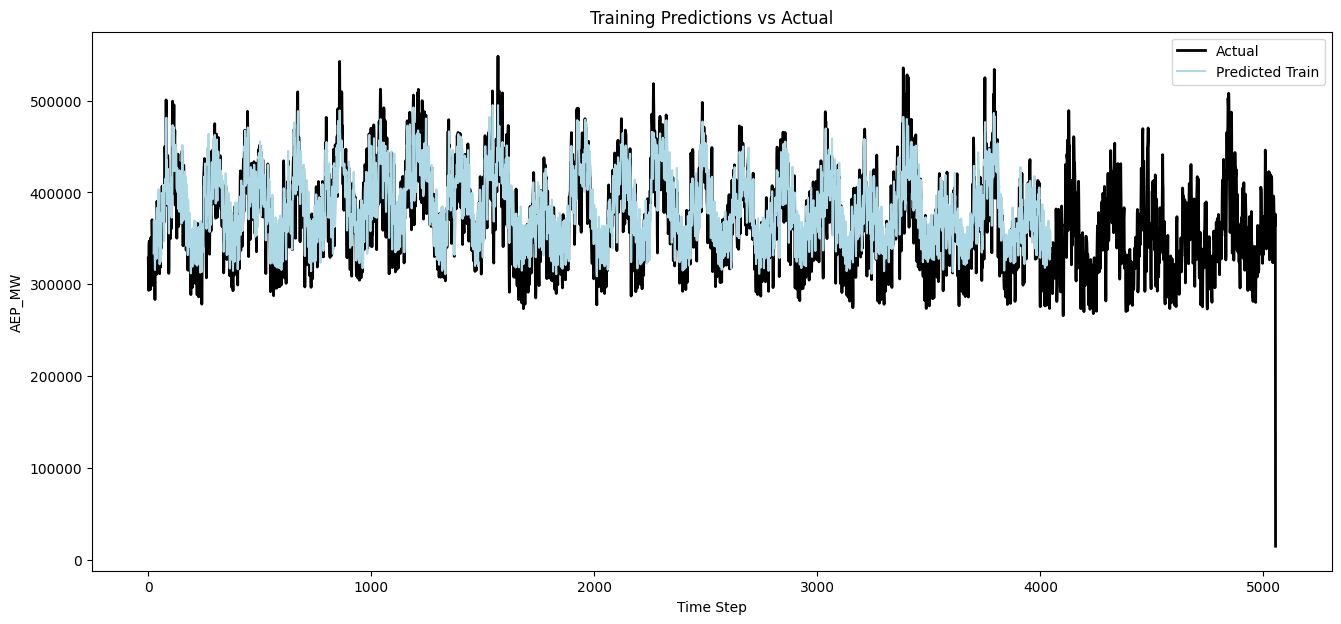

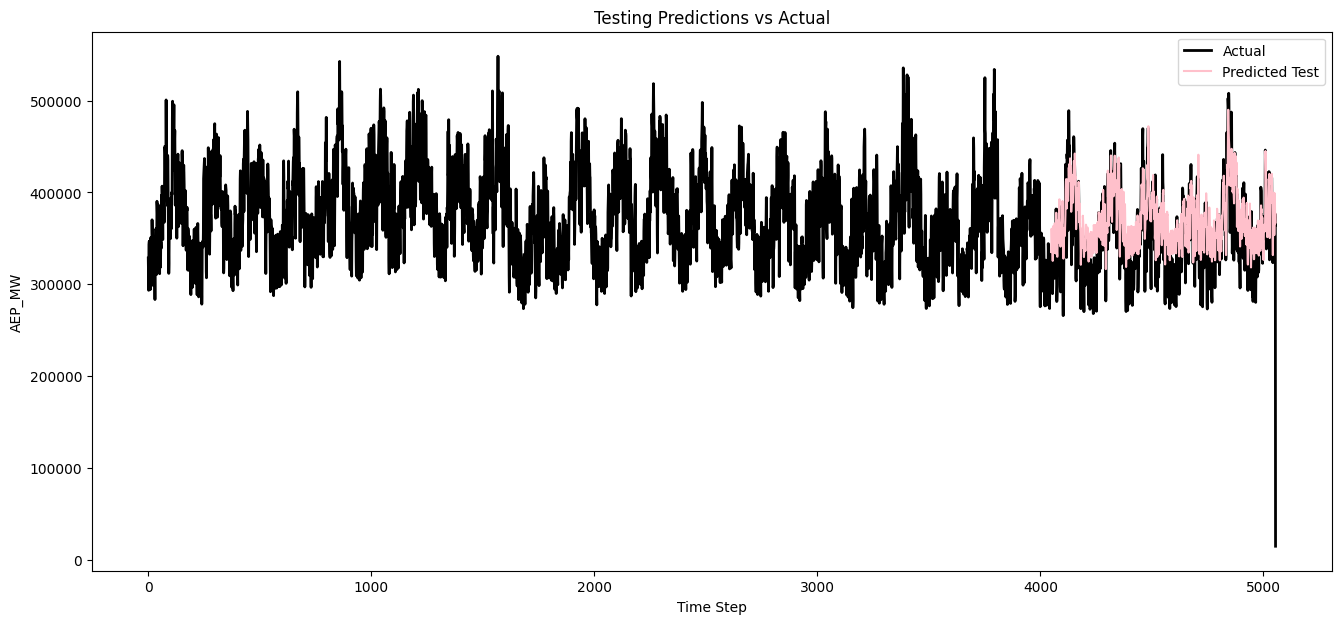

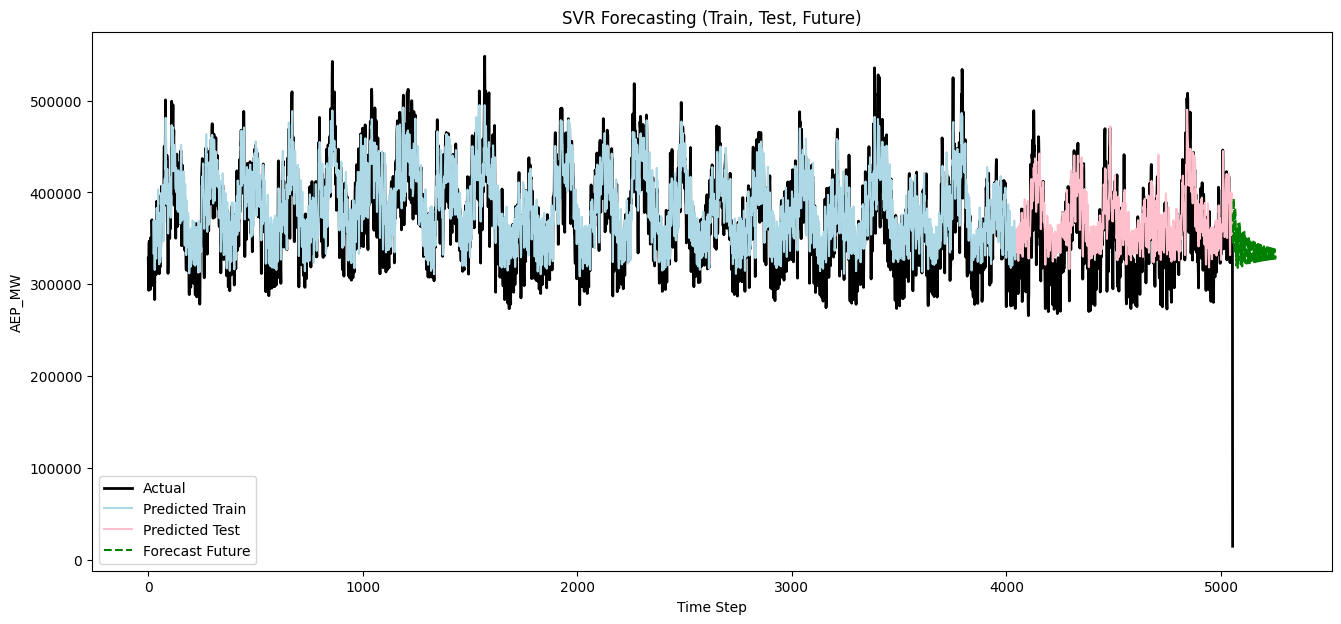

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from math import sqrt

# === 1. Ambil data ===
series = df_aep['AEP_MW'].dropna().values.reshape(-1, 1)

# Normalisasi (optional)
scaler = MinMaxScaler(feature_range=(0, 1))
series_scaled = scaler.fit_transform(series)

# === 2. Buat lag features ===
def create_dataset(data, lag=24):
    X, y = [], []
    for i in range(len(data) - lag):
        X.append(data[i:(i + lag), 0])
        y.append(data[i + lag, 0])
    return np.array(X), np.array(y)

lag = 24
X, y = create_dataset(series_scaled, lag)

# === 3. Train-Test Split ===
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# === 4. Model Support Vector Regression ===
svr = SVR(kernel='rbf', C=100, gamma='scale')
svr.fit(X_train, y_train.ravel())

# === 5. Prediksi ===
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Balikin skala
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_train_pred_inv = scaler.inverse_transform(y_train_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_pred_inv = scaler.inverse_transform(y_test_pred.reshape(-1, 1))

# === 6. Hitung RMSE dan MAPE ===
rmse_train = sqrt(mean_squared_error(y_train_inv, y_train_pred_inv))
mape_train = np.mean(np.abs((y_train_inv - y_train_pred_inv) / y_train_inv)) * 100

rmse_test = sqrt(mean_squared_error(y_test_inv, y_test_pred_inv))
mape_test = np.mean(np.abs((y_test_inv - y_test_pred_inv) / y_test_inv)) * 100

print(f"RMSE Train: {rmse_train:.2f}, MAPE Train: {mape_train:.2f}%")
print(f"RMSE Test: {rmse_test:.2f}, MAPE Test: {mape_test:.2f}%")

# === 7. Forecast ke depan ===
future_steps = 200
last_input = X_test[-1]
pred_future = []

current_input = last_input.copy()
for _ in range(future_steps):
    next_val = svr.predict(current_input.reshape(1, -1))[0]
    pred_future.append(next_val)
    current_input = np.append(current_input[1:], next_val)

pred_future_inv = scaler.inverse_transform(np.array(pred_future).reshape(-1, 1))

# === 8. Tabel Data Aktual dan Prediksi ===
# Menggabungkan hasil pelatihan dan pengujian
results_train = pd.DataFrame({
    'Period': range(1, len(y_train_inv) + 1),
    'Actual': y_train_inv.flatten(),
    'Predicted': y_train_pred_inv.flatten()
})

results_test = pd.DataFrame({
    'Period': range(len(y_train_inv) + 1, len(y_train_inv) + len(y_test_inv) + 1),
    'Actual': y_test_inv.flatten(),
    'Predicted': y_test_pred_inv.flatten()
})

# Menggabungkan kedua tabel
results = pd.concat([results_train, results_test], ignore_index=True)

# Menampilkan tabel hasil lengkap
print("\n=== Tabel Hasil Lengkap ===")
print(results)

# === 9. Plot untuk training ===
plt.figure(figsize=(16, 7))
plt.plot(series, label='Actual', color='black', linewidth=2)
train_index = range(lag, lag + len(y_train))
plt.plot(train_index, y_train_pred_inv, label='Predicted Train', color='lightblue')
plt.title("Training Predictions vs Actual")
plt.xlabel("Time Step")
plt.ylabel("AEP_MW")
plt.legend()
plt.show()

# === 10. Plot untuk testing ===
plt.figure(figsize=(16, 7))
plt.plot(series, label='Actual', color='black', linewidth=2)
test_index = range(lag + len(y_train), lag + len(y_train) + len(y_test))
plt.plot(test_index, y_test_pred_inv, label='Predicted Test', color='pink')
plt.title("Testing Predictions vs Actual")
plt.xlabel("Time Step")
plt.ylabel("AEP_MW")
plt.legend()
plt.show()

# === 11. Plot gabungan ===
plt.figure(figsize=(16, 7))
plt.plot(series, label='Actual', color='black', linewidth=2)
plt.plot(train_index, y_train_pred_inv, label='Predicted Train', color='lightblue')
plt.plot(test_index, y_test_pred_inv, label='Predicted Test', color='pink')
future_index = range(lag + len(y_train) + len(y_test), lag + len(y_train) + len(y_test) + future_steps)
plt.plot(future_index, pred_future_inv, label='Forecast Future', color='green', linestyle='--')
plt.title("SVR Forecasting (Train, Test, Future)")
plt.xlabel("Time Step")
plt.ylabel("AEP_MW")
plt.legend()
plt.show()

## Forecasting per hari

RMSE Train: 26331.33, MAPE Train: 5.84%
RMSE Test: 28938.40, MAPE Test: 8.87%

=== Tabel Hasil Lengkap ===
      Period    Actual      Predicted
0          1  311997.0  342914.667867
1          2  293450.0  334263.099385
2          3  343417.0  327389.858325
3          4  346553.0  355215.171259
4          5  346195.0  357634.644093
...      ...       ...            ...
5049    5050  368834.0  342321.268375
5050    5051  364327.0  376062.280466
5051    5052  363628.0  371897.518594
5052    5053  376504.0  371270.219170
5053    5054   14809.0  383330.688848

[5054 rows x 3 columns]


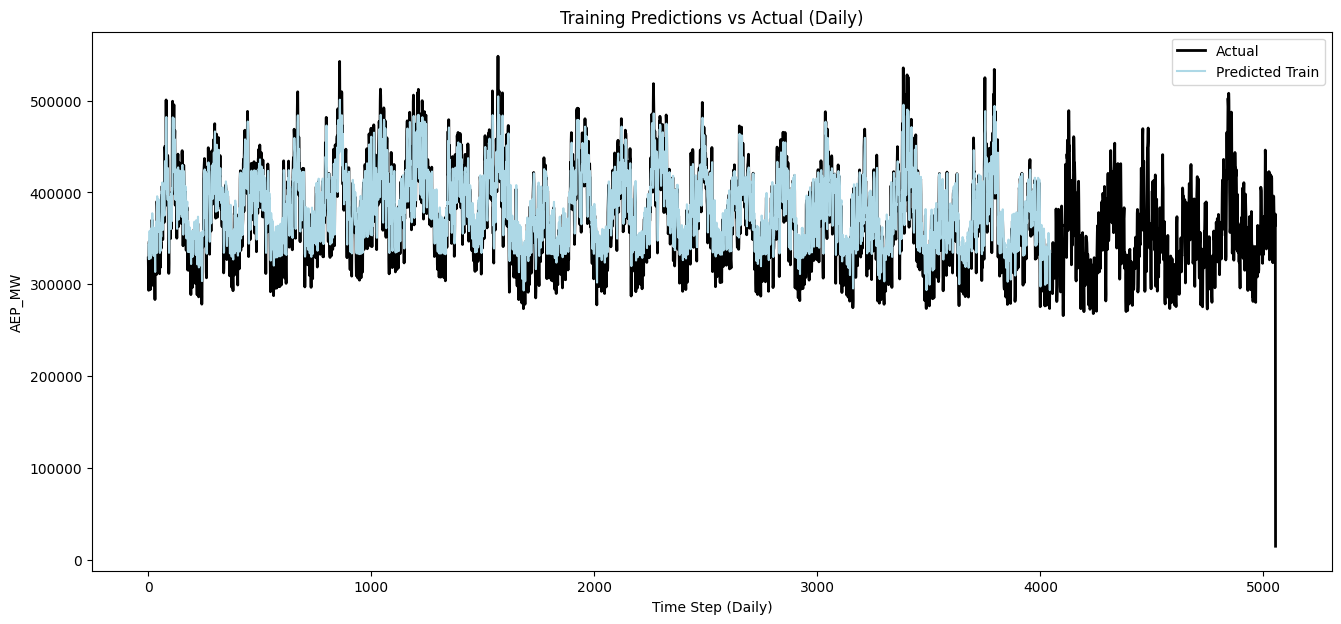

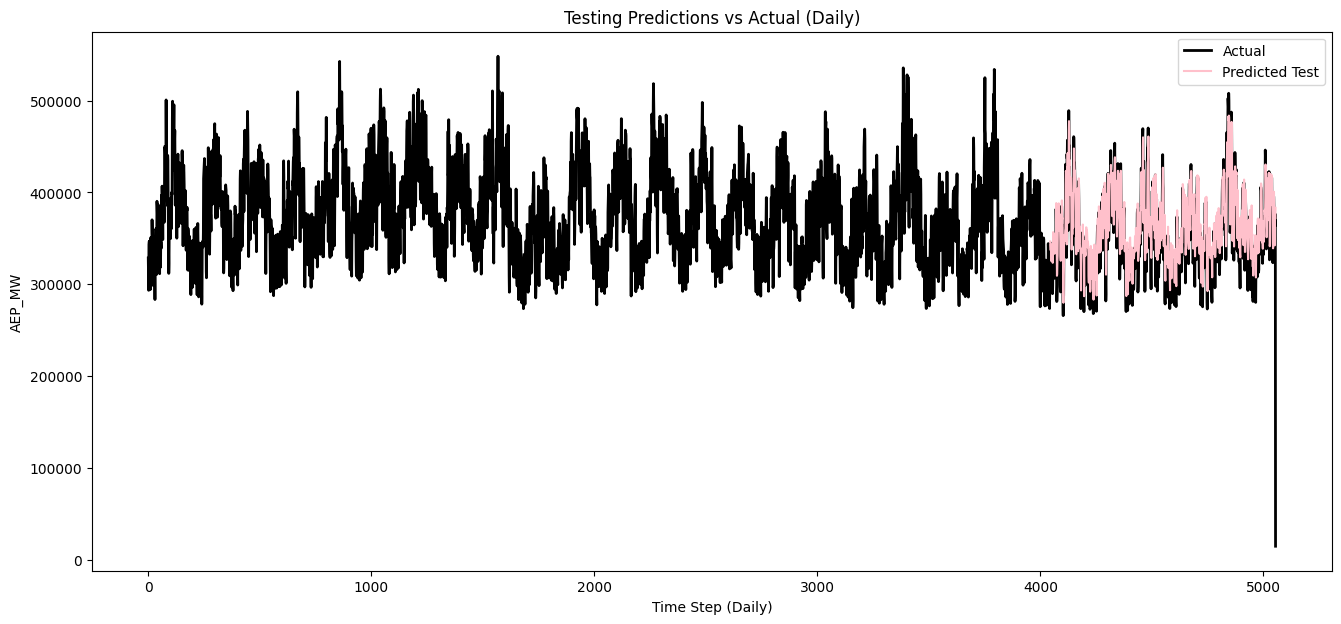

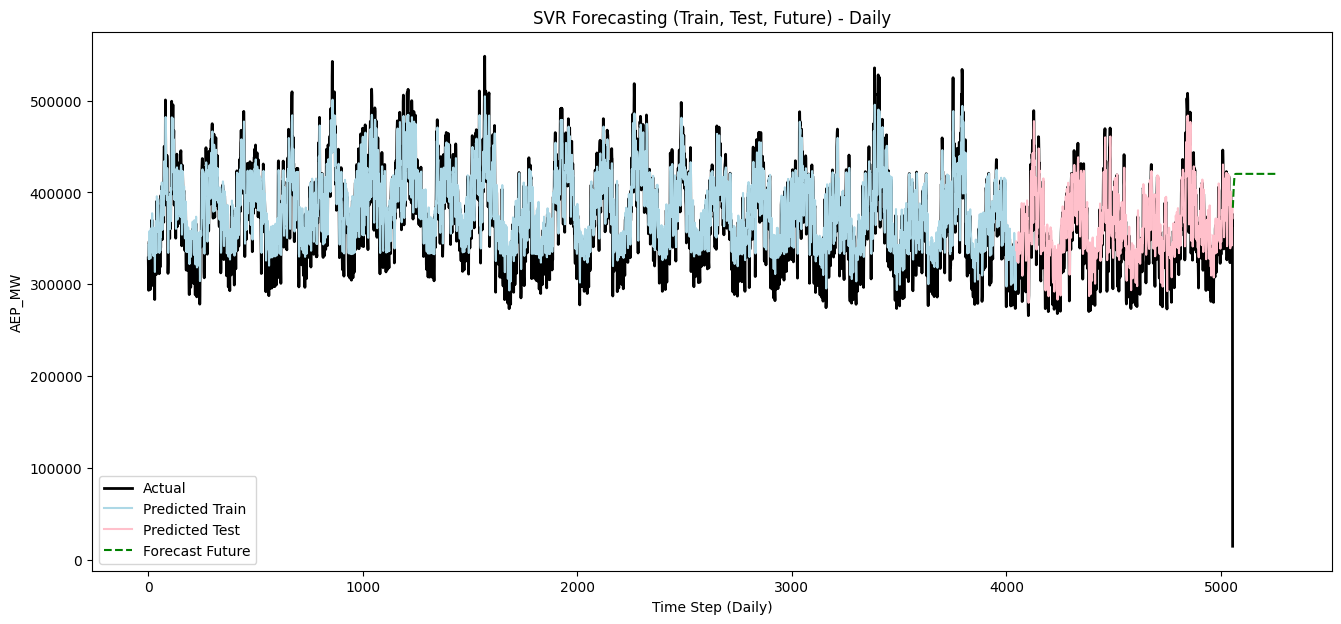

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from math import sqrt

# === 1. Ambil data ===
series = df_aep['AEP_MW'].dropna().values.reshape(-1, 1)

# Normalisasi (optional)
scaler = MinMaxScaler(feature_range=(0, 1))
series_scaled = scaler.fit_transform(series)

# === 2. Buat lag features untuk har ===
def create_dataset(data, lag=1):  # Lag diatur menjadi 1 untuk prediksi harian
    X, y = [], []
    for i in range(len(data) - lag):
        X.append(data[i:(i + lag), 0])
        y.append(data[i + lag, 0])
    return np.array(X), np.array(y)

lag = 1  # Menggunakan lag 1 untuk data harian
X, y = create_dataset(series_scaled, lag)

# === 3. Train-Test Split ===
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# === 4. Model Support Vector Regression ===
svr = SVR(kernel='rbf', C=100, gamma='scale')
svr.fit(X_train, y_train.ravel())

# === 5. Prediksi ===
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Balikin skala
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_train_pred_inv = scaler.inverse_transform(y_train_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_pred_inv = scaler.inverse_transform(y_test_pred.reshape(-1, 1))

# === 6. Hitung RMSE dan MAPE ===
rmse_train = sqrt(mean_squared_error(y_train_inv, y_train_pred_inv))
mape_train = np.mean(np.abs((y_train_inv - y_train_pred_inv) / y_train_inv)) * 100

rmse_test = sqrt(mean_squared_error(y_test_inv, y_test_pred_inv))
mape_test = np.mean(np.abs((y_test_inv - y_test_pred_inv) / y_test_inv)) * 100

print(f"RMSE Train: {rmse_train:.2f}, MAPE Train: {mape_train:.2f}%")
print(f"RMSE Test: {rmse_test:.2f}, MAPE Test: {mape_test:.2f}%")

# === 7. Forecast ke depan ===
future_steps = 200
last_input = X_test[-1]
pred_future = []

current_input = last_input.copy()
for _ in range(future_steps):
    next_val = svr.predict(current_input.reshape(1, -1))[0]
    pred_future.append(next_val)
    current_input = np.append(current_input[1:], next_val)

pred_future_inv = scaler.inverse_transform(np.array(pred_future).reshape(-1, 1))

# === 8. Tabel Data Aktual dan Prediksi ===
# Menggabungkan hasil pelatihan dan pengujian
results_train = pd.DataFrame({
    'Period': range(1, len(y_train_inv) + 1),
    'Actual': y_train_inv.flatten(),
    'Predicted': y_train_pred_inv.flatten()
})

results_test = pd.DataFrame({
    'Period': range(len(y_train_inv) + 1, len(y_train_inv) + len(y_test_inv) + 1),
    'Actual': y_test_inv.flatten(),
    'Predicted': y_test_pred_inv.flatten()
})

# Menggabungkan kedua tabel
results = pd.concat([results_train, results_test], ignore_index=True)

# Menampilkan tabel hasil lengkap
print("\n=== Tabel Hasil Lengkap ===")
print(results)

# === 9. Plot untuk training ===
plt.figure(figsize=(16, 7))
plt.plot(series, label='Actual', color='black', linewidth=2)
train_index = range(lag, lag + len(y_train))
plt.plot(train_index, y_train_pred_inv, label='Predicted Train', color='lightblue')
plt.title("Training Predictions vs Actual (Daily)")
plt.xlabel("Time Step (Daily)")
plt.ylabel("AEP_MW")
plt.legend()
plt.show()

# === 10. Plot untuk testing ===
plt.figure(figsize=(16, 7))
plt.plot(series, label='Actual', color='black', linewidth=2)
test_index = range(lag + len(y_train), lag + len(y_train) + len(y_test))
plt.plot(test_index, y_test_pred_inv, label='Predicted Test', color='pink')
plt.title("Testing Predictions vs Actual (Daily)")
plt.xlabel("Time Step (Daily)")
plt.ylabel("AEP_MW")
plt.legend()
plt.show()

# === 11. Plot gabungan ===
plt.figure(figsize=(16, 7))
plt.plot(series, label='Actual', color='black', linewidth=2)
plt.plot(train_index, y_train_pred_inv, label='Predicted Train', color='lightblue')
plt.plot(test_index, y_test_pred_inv, label='Predicted Test', color='pink')
future_index = range(lag + len(y_train) + len(y_test), lag + len(y_train) + len(y_test) + future_steps)
plt.plot(future_index, pred_future_inv, label='Forecast Future', color='green', linestyle='--')
plt.title("SVR Forecasting (Train, Test, Future) - Daily")
plt.xlabel("Time Step (Daily)")
plt.ylabel("AEP_MW")
plt.legend()
plt.show()

## Forecasting per minggu

RMSE Train: 25807.24, MAPE Train: 5.66%
RMSE Test: 34724.47, MAPE Test: 10.34%

=== Tabel Hasil Lengkap ===
      Period    Actual      Predicted
0          1  344408.0  362381.414288
1          2  310429.0  319391.605665
2          3  294249.0  301387.452466
3          4  343194.0  313506.499644
4          5  350758.0  374052.834665
...      ...       ...            ...
5043    5044  368834.0  379631.256283
5044    5045  364327.0  397195.410042
5045    5046  363628.0  362204.522667
5046    5047  376504.0  365055.503466
5047    5048   14809.0  398951.469487

[5048 rows x 3 columns]


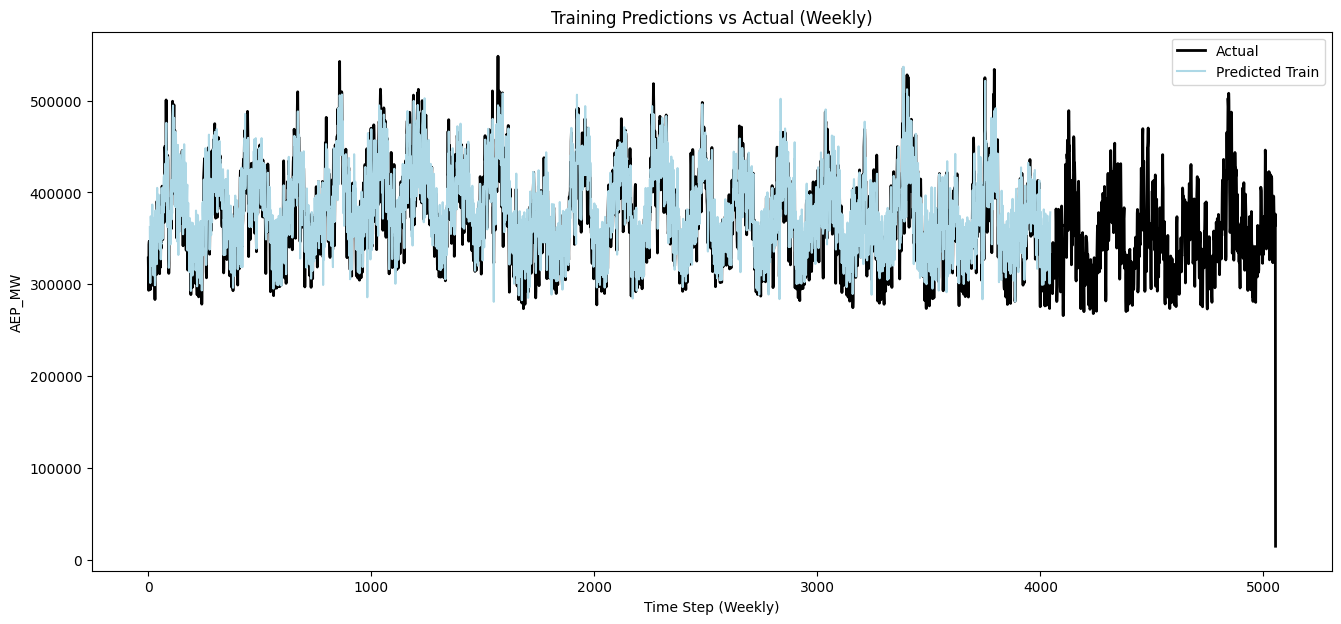

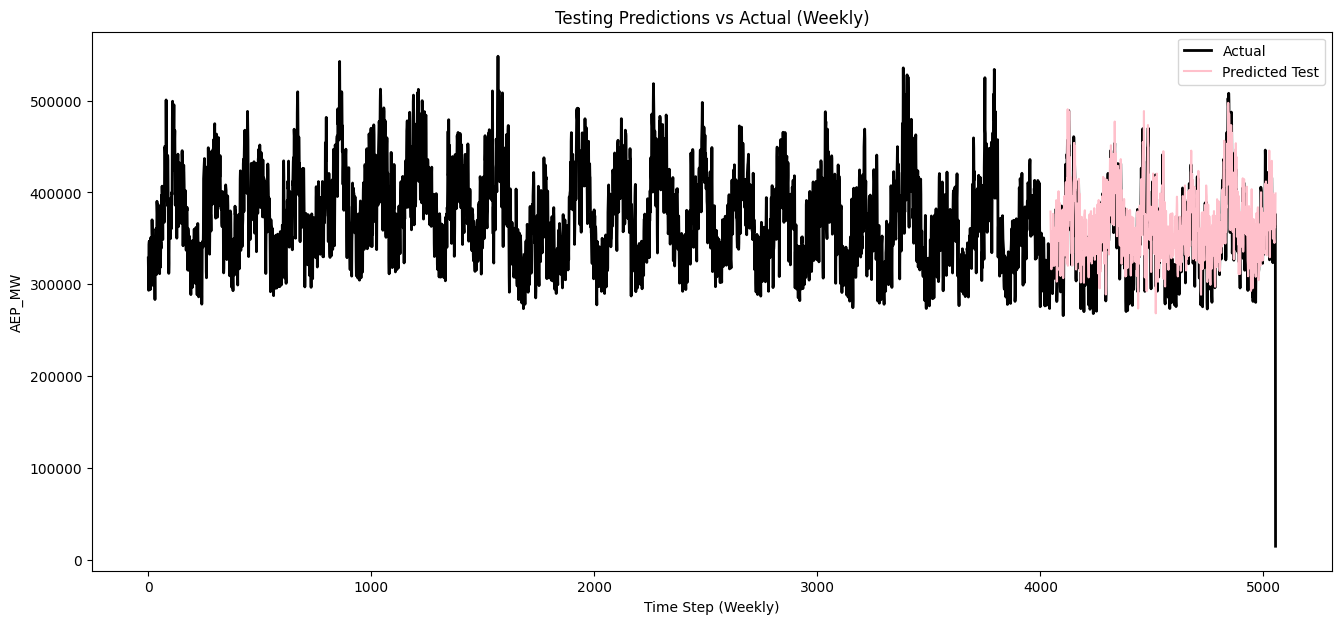

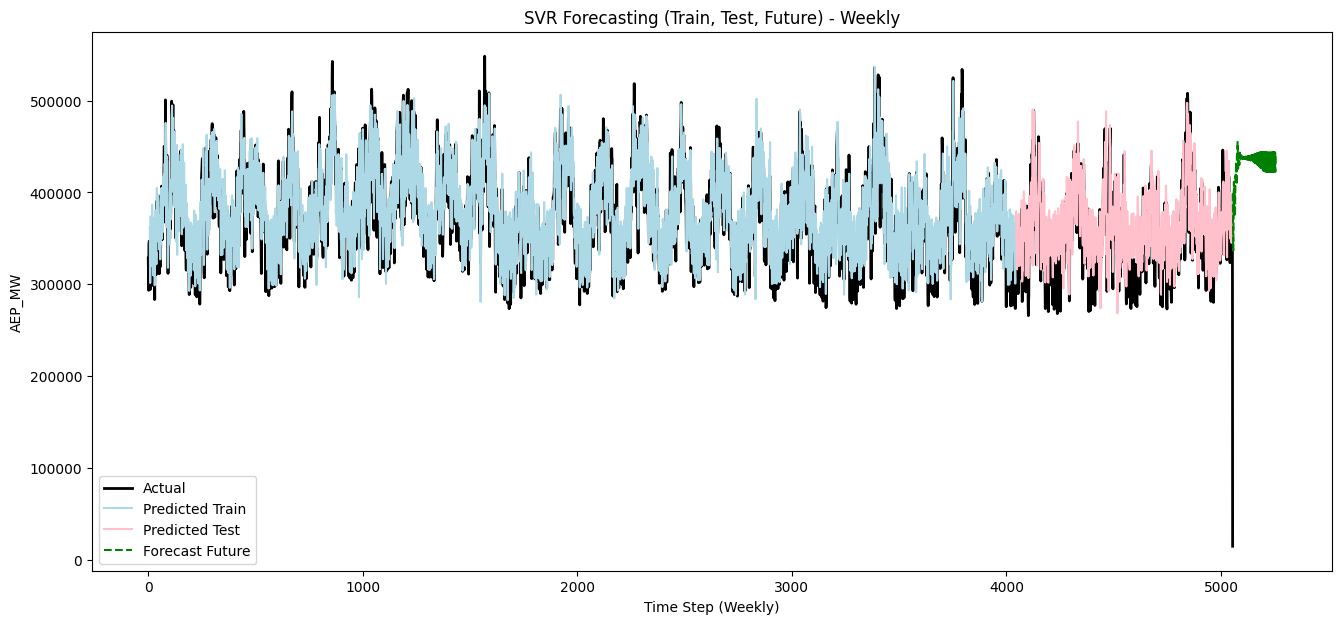

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from math import sqrt

# === 1. Ambil data ===
series = df_aep['AEP_MW'].dropna().values.reshape(-1, 1)

# Normalisasi (optional)
scaler = MinMaxScaler(feature_range=(0, 1))
series_scaled = scaler.fit_transform(series)

# === 2. Buat lag features untuk mingguan ===
def create_dataset(data, lag=7):  # Lag diatur menjadi 7 untuk prediksi mingguan
    X, y = [], []
    for i in range(len(data) - lag):
        X.append(data[i:(i + lag), 0])
        y.append(data[i + lag, 0])
    return np.array(X), np.array(y)

lag = 7  # Menggunakan lag 7 untuk data mingguan
X, y = create_dataset(series_scaled, lag)

# === 3. Train-Test Split ===
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# === 4. Model Support Vector Regression ===
svr = SVR(kernel='rbf', C=100, gamma='scale')
svr.fit(X_train, y_train.ravel())

# === 5. Prediksi ===
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Balikin skala
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_train_pred_inv = scaler.inverse_transform(y_train_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_pred_inv = scaler.inverse_transform(y_test_pred.reshape(-1, 1))

# === 6. Hitung RMSE dan MAPE ===
rmse_train = sqrt(mean_squared_error(y_train_inv, y_train_pred_inv))
mape_train = np.mean(np.abs((y_train_inv - y_train_pred_inv) / y_train_inv)) * 100

rmse_test = sqrt(mean_squared_error(y_test_inv, y_test_pred_inv))
mape_test = np.mean(np.abs((y_test_inv - y_test_pred_inv) / y_test_inv)) * 100

print(f"RMSE Train: {rmse_train:.2f}, MAPE Train: {mape_train:.2f}%")
print(f"RMSE Test: {rmse_test:.2f}, MAPE Test: {mape_test:.2f}%")

# === 7. Forecast ke depan ===
future_steps = 200
last_input = X_test[-1]
pred_future = []

current_input = last_input.copy()
for _ in range(future_steps):
    next_val = svr.predict(current_input.reshape(1, -1))[0]
    pred_future.append(next_val)
    current_input = np.append(current_input[1:], next_val)

pred_future_inv = scaler.inverse_transform(np.array(pred_future).reshape(-1, 1))

# === 8. Tabel Data Aktual dan Prediksi ===
# Menggabungkan hasil pelatihan dan pengujian
results_train = pd.DataFrame({
    'Period': range(1, len(y_train_inv) + 1),
    'Actual': y_train_inv.flatten(),
    'Predicted': y_train_pred_inv.flatten()
})

results_test = pd.DataFrame({
    'Period': range(len(y_train_inv) + 1, len(y_train_inv) + len(y_test_inv) + 1),
    'Actual': y_test_inv.flatten(),
    'Predicted': y_test_pred_inv.flatten()
})

# Menggabungkan kedua tabel
results = pd.concat([results_train, results_test], ignore_index=True)

# Menampilkan tabel hasil lengkap
print("\n=== Tabel Hasil Lengkap ===")
print(results)

# === 9. Plot untuk training ===
plt.figure(figsize=(16, 7))
plt.plot(series, label='Actual', color='black', linewidth=2)
train_index = range(lag, lag + len(y_train))
plt.plot(train_index, y_train_pred_inv, label='Predicted Train', color='lightblue')
plt.title("Training Predictions vs Actual (Weekly)")
plt.xlabel("Time Step (Weekly)")
plt.ylabel("AEP_MW")
plt.legend()
plt.show()

# === 10. Plot untuk testing ===
plt.figure(figsize=(16, 7))
plt.plot(series, label='Actual', color='black', linewidth=2)
test_index = range(lag + len(y_train), lag + len(y_train) + len(y_test))
plt.plot(test_index, y_test_pred_inv, label='Predicted Test', color='pink')
plt.title("Testing Predictions vs Actual (Weekly)")
plt.xlabel("Time Step (Weekly)")
plt.ylabel("AEP_MW")
plt.legend()
plt.show()

# === 11. Plot gabungan ===
plt.figure(figsize=(16, 7))
plt.plot(series, label='Actual', color='black', linewidth=2)
plt.plot(train_index, y_train_pred_inv, label='Predicted Train', color='lightblue')
plt.plot(test_index, y_test_pred_inv, label='Predicted Test', color='pink')
future_index = range(lag + len(y_train) + len(y_test), lag + len(y_train) + len(y_test) + future_steps)
plt.plot(future_index, pred_future_inv, label='Forecast Future', color='green', linestyle='--')
plt.title("SVR Forecasting (Train, Test, Future) - Weekly")
plt.xlabel("Time Step (Weekly)")
plt.ylabel("AEP_MW")
plt.legend()
plt.show()

# Kesimpulan

* Untuk data yang non-linear, tidak normal, tetapi stasioner, penting untuk memilih metode forecasting yang dapat menangani kompleksitas pola data tanpa bergantung pada asumsi distribusi tertentu.
* Metode yang memberikan hasil forecasting terbaik dari per jam, per hari, dan per minggu berdasarkan nilai error MAPE adalah **XGBoost**.